<a href="https://colab.research.google.com/github/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/blob/main/WAI_Crash_Investigation_Erumena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics Project I: Analysis Airplane Crashes 1908-2019
This template is designed for the Women in AI (WAI) project May 2022 Cohort. The purpose of this project is to expose the WAI participants with a data analytic project related to aerospace and aviation. The objective of this project is to analyze, categorize and visualize airplane crash data. The goal of this project is to provide the paricipants with the tools and technqiues that are applicable to practical data analytics problems in aerospace and aviation. 






Learning Objectives: 
* Data visualization 
* Basic statistical analysis 
* Basic use of Python 
* Basic ML skills

Requirements/Pre-requisits: 
* STEM Background: No
* Data-science/ML/AI: Begginer / limited experience
* Python: Begginer - some experience prefered but not mandatory



Author of the template and mentor for this project: \
Katarina Vuckovic \
Systems Engineer and Data-Scientist at Collins Aerospace\
Contact: katarina.vuckovic@collins.com \

"Airplane Crashes Since 1908" dataset source: 
https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

Reference Links:
* https://github.com/mrefford/EE_551


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
%cd drive/My\ Drive/Colab\ Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/geocoder


In [ ]:
from pathlib import Path

print(Path.cwd())  # /home/skovorodkin/stack

/content/drive/My Drive/Colab Notebooks/geocoder


#Load Dataset

In [ ]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
#df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
df=pd.read_pickle("https://github.com/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/raw/main/dataset/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.pkl")
df.shape

(4967, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [ ]:
#df.head()
#df.tail(5)

In [ ]:
df.rename(columns = {'geopyLoc':'Coordinates', 'geopyRoute':'Route_Coordinates'}, inplace = True)

df.columns=df.columns.str.replace(' ','_')

#df.info()

In [ ]:
pd.set_option("display.max_colwidth", -1)
df.Summary.head(10)

0    During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.
1    Eugene Lefebvre was the first pilot to ever be killed in an air accident, after his controls jambed while flying in an air show.                                                                                                                                                                                                                                                                                                                                                             

Advanced exploratory data analysis (EDA) with Python: 
https://medium.com/p/536fa83c578a 

##Task 1 - Categorization and Visualization
###Task 1.1: Categorize by Operator (military, commertial(airline), test, sport...)
 * Define 5-7 categories (Example of categories: military, commertial(airline), test, sport...)
    * Q1: How many planes crashed per category? (sum number of crashes)
    * Q2: How many fatalities per category?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

In [ ]:
#Hint - first list all different types of operator using code below. Create bar chart for that  
operators_unique = df.Operator.unique()
operators = df.Operator.value_counts()
print(operators)

Aeroflot                                   255
Military - U.S. Air Force                  140
Air France                                 72 
Deutsche Lufthansa                         63 
United Air Lines                           44 
                                           .. 
Houston Metro Airlines                     1  
Wenela Air Services                        1  
Sierra Pacific Airlines                    1  
Pathet Lao Airlines                        1  
Aeroflot Russian International Airlines    1  
Name: Operator, Length: 2242, dtype: int64


In [ ]:
#create categories of aircraft operators from the operators column
df["Operator_Category"] ="Other"

Operator_Cat = {"Military":["Military","military","Army","Air Force","Airforce", "Force","Police","Fuerza","Defense","Guardia","TAM","Self-Defence"],
         "Airline":["Airline*","Air Line*","AirNow", "Airway*","Aerolineas","Aerocalifornia", "Loide","Swissair", "Avesca", "Air","Pacific","Aerotransport","Alantis","ACES","Airborne","Linea*","Agni","Alaska","Airquarius",
                    "Austria","ADES","Aigle", "ATI","Australian","Aer Lingus", "Airwave","Alia", "National Air Transport", "Aer Turas","Alas","Colombia","Aeralpi","Air-Lift","Alitalia","Aviaimpex","Aereo*","Alyemda","Aeroflot",
                    "Airlink*","Amee","Aviaco", "Aero*","Flyers","Ameriflight", "Aerocaribbean","Ansett", "Avianca", "Aerocaribe","Airtech","Ararat","Aerochasqui","Airwork","Arctic","Alfa","Armavia","Aeroco*","Airfast","Flydubai",
                    "Aviastar","Agencia","Spirit", "Aviateca","Congo","Travel", "Associated","Aviation", "Commuter", "Akhal","Avensa","Avis","Flight","Ala","Aviogenex","Avistar","Aerolinie","Aerea","Avisto","Channel","Filair","Gabon",
                    "Balair","Dominicana","Biman", "Civil","Cubana","Emirates", "Flug","Comair", "Airlinex", "Finnair","Nordair","Savanair","Savannair","Bazair","Compagnie","Ecuatair","Aire","Linhas","Binter","Compania","Ecuato","Garamut",
                    "Fragtflug","Prinair","BOAC", "Condor","E.A.S","Empressa", "Empresa","Nordeste", "Bodensee", "Connair","Egyptair","Panair","Talair","Braathens","Continental","Eurasia","Martinair","Servicio*","Britavia","Conviasa","ELK",
                    "Italilia","Misair","Sibir", "Bulair","Crossair","Enimex", "Farnair","Misrair", "SilkAir", "Calair","Dan-Air","Fairflight","Faucett","Palair","Skyline","Carvair","Deutche","Fairways","Fujita","Pakair","Transair","Montserrat",
                    "Transasia","Germanwings","Airlink", "Grand Canyon","Union","Grands", "Guicango","Handley", "Khong", "Qantas","United","Ibertrans","Icelandair","Inair","Inex","Propair","Aviacion","Interflug","IrAvia","Itavia","Jamair",
                    "Kamchatka","Skyways","Kata", "Khors","Quebecair","United", "USAir","UTAir", "Vanair", "Komi","LACSA","Ladeco","Lambair","Lineas","Linee","Lionair","Lloyd","Loganair","Onzeair","LOT","Lufthansa",
                    "Luxair","Nationair"],
         "Private":["Private", "Charter", "Jet*", "Leasing", "Dai Nippon","India","AE Aviation","Corp","AIDA","CAMBA","Airbus","CATC","Airwork","CATA","Aeronautical","IRS","Allied","CNAC","Alpha","Astro","Chamberlin",
                    "Alpine","Autrex","Circuit","Ambler","Caproni","Havilland","Eagle","Boeing","Maniema","Express","Bombardier","Cruzeiro","Bristol","Airtour*","Curtiss","ANDESA","Aircraft","Devlet","Angel","Business",
                    "Electricity","APRL","Butler","Golden","Arall","CAAC","Classic","Douglas","Aramar","CAAK","Aramaco","Cable","Dakota","AREA","Flying","Embry","Flightline","Emery","Fokker","Evolga","Ford","Funds",
                    "Freedom","FAMA","Frontier","Falcon","Gambcrest","Hydro","Gander","GCI","Great Lakes","Government","Hageland","Hamilton","Club","Harrington's","Heart","Living","Herfurtner","Horizon","Medical","Hoseba",
                    "Indamer","Control","Security","Jetcom","Shell","Johnson","Fire","Company","ValuJet","Kiev","Knowles","LAMIA","Acres","Air Ambulance","Med","Metrojet","Missionary","Mission","Mustang","United Nations","University"],
         "Cargo":["FedEx","Cargo","Air Cargo","Ababeel","Federal Express","Tiger","Aca-Ancargo","Golden Star","Juba","Regina","Freight","Parcel","Export","Atran","Carga","Cargolux", "Mail Services", "Aeropostale"],
         "Air_Taxi":["Helicopter*", "Heli", "Helikopter*","Taxi","Air Taxi", "Aerotaxi","Heliandes","Helicsa","HeliCusco","Hevlift","Cityhopper"]
  }

for op_cat in Operator_Cat:
  filter=df["Operator"].str.contains('|'.join(Operator_Cat[op_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Operator_Category"] = op_cat

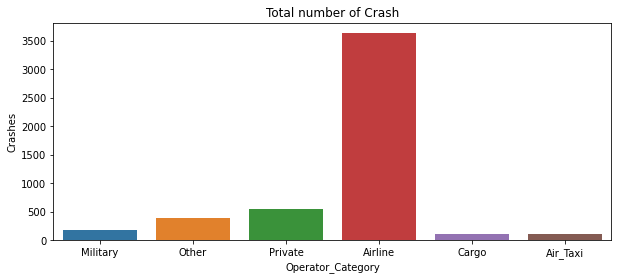

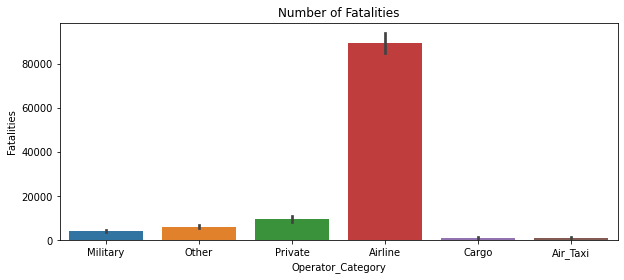

In [ ]:
#total number of crashes for each operator category
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Operator_Category')
plt.title('Total number of Crash')
plt.ylabel('Crashes');

#Total number of fatalities for each operator category
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Operator_Category', y='Fatalities', data=df, estimator=sum)
plt.title('Number of Fatalities');

###Task 1.2: Categorize by AC Type 
 * Define n categories (Boeing, Airbus, Antonov...etc)
    * Q1: How many planes crashed? (sum number of crashes)
    * Q2: How many fatalities?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

 

In [ ]:
#Aicraft type is categorised based on manufacturers
df["Manufacturer"] ="Other"

Aircraft_Cat = {"Zeppelin":["Zeppelin"],
         "Wright Brothers":["Wright"],
         "Dirigible":["Dirigible"],
         "Curtiss":["Curtiss","Curtis"],
         "De Havilland":["De Havilland"],
         "Farman":["Farman"],
         "Handley":["Handley", "Page"],
         "Junkers":["Breguet"],
         "Bleriot":["Bleriot"],
         "Fokker":["Fokker"],
         "Caudron":["Caudron"],
         "Sikorsky":["Sikorsky"],
         "Douglas":["Douglas", "Dougals", "Mc Donnel", "McDonnell"],
         "Dornier":["Dornier"],
         "Fairchild":["Fairchild"],
         "Boeing":["Boeing"],
         "Avro":["Avro"],
         "Bristol":["Bristol"],
         "Spad":["Spad"],
         "Olivier":["Olivier"],
         "Fokker":["Fokker"],
         "Latecoere":["Latecoere"],
         "Ford":["Ford"],
         "Vickers":["Vickers"],
         "Stinson":["Stinson"],
         "Lockheed":["Lockheed"],
         "Antonov":["Antonov"],
         "Savoia":["Savoia"],
         "Consolidated":["Consolidated"],
         "Short":["Short"],
         "Grumman":["Grumman"],
         "Cessna":["Cessna"],
         "Yakovlev":["Yakovlev"],
         "Beechcraft":["Beechcraft", "Beech"],
         "Tupolev":["Tupolev"],
         "Embraer":["Embraer"],
         "Mil Mi":["Mil Mi","Mi", "MiG"],
         "Airbus":["Airbus","Eurocopter"],
         "Britten Norman":["Britten Norman","Pilatus"],
         "Hawker":["Hawker"],
         "Aero Commander":["Aero Commander"],
         "Ilyushin":["Ilyushin"],
         "Aerospatiale":["Aerospatiale", "Nord"],
         "ATR":["ATR"],
         "BAC":["BAC"],
         "Bell":["Bell"],
         "British Aerospace":["British Aerospace", "BAe"],
         "CASA":["CASA", "Aviocar"],
         "Convair":["Convair"],
         "Dassault":["Dassault"],
         "GAF Nomad":["GAF Nomad"],
         "Learjet":["Gates", "Learjet", "Lear"],
         "Let":["Let"],
         "NAMC":["NAMC"],
         "Piper":["Piper"],
         "Syberjet":["Swearingen"],
         "Sud Aviation Caravelle":["Sud Aviation Caravelle"],
         "Bombardier":["Bombardier", "Canadair"]
  }


for ac_cat in Aircraft_Cat:
  filter=df["AC_Type"].str.contains('|'.join(Aircraft_Cat[ac_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Manufacturer"] = ac_cat


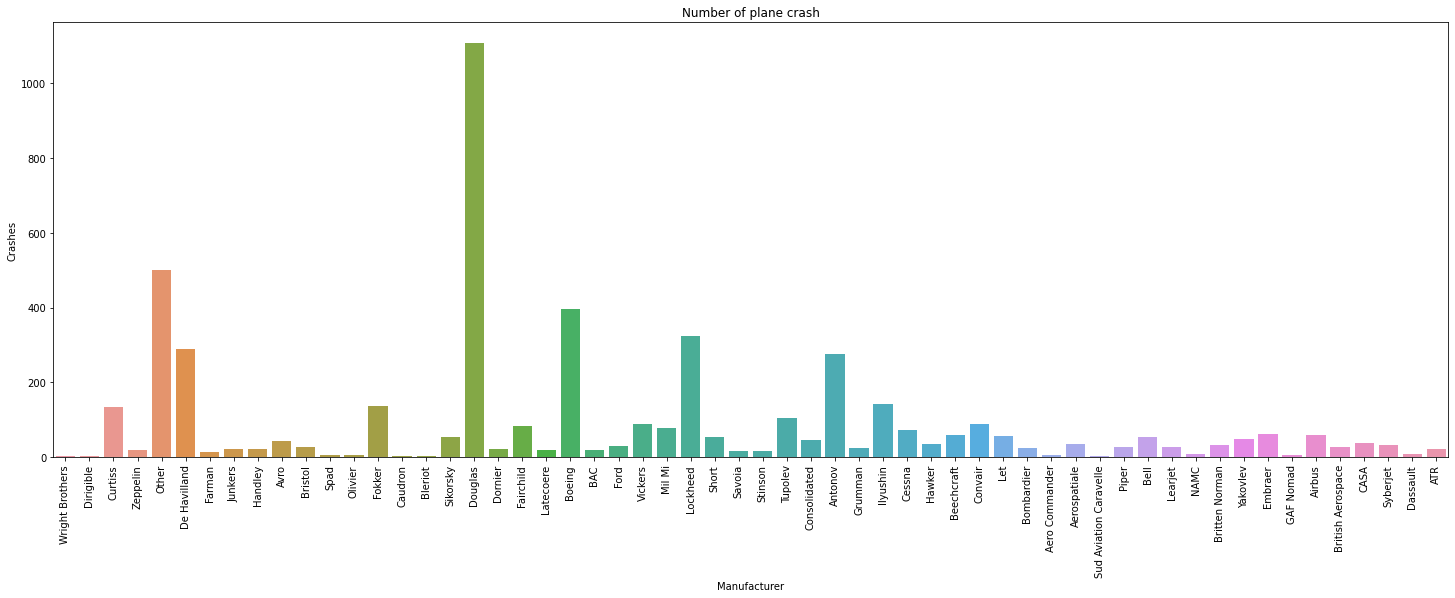

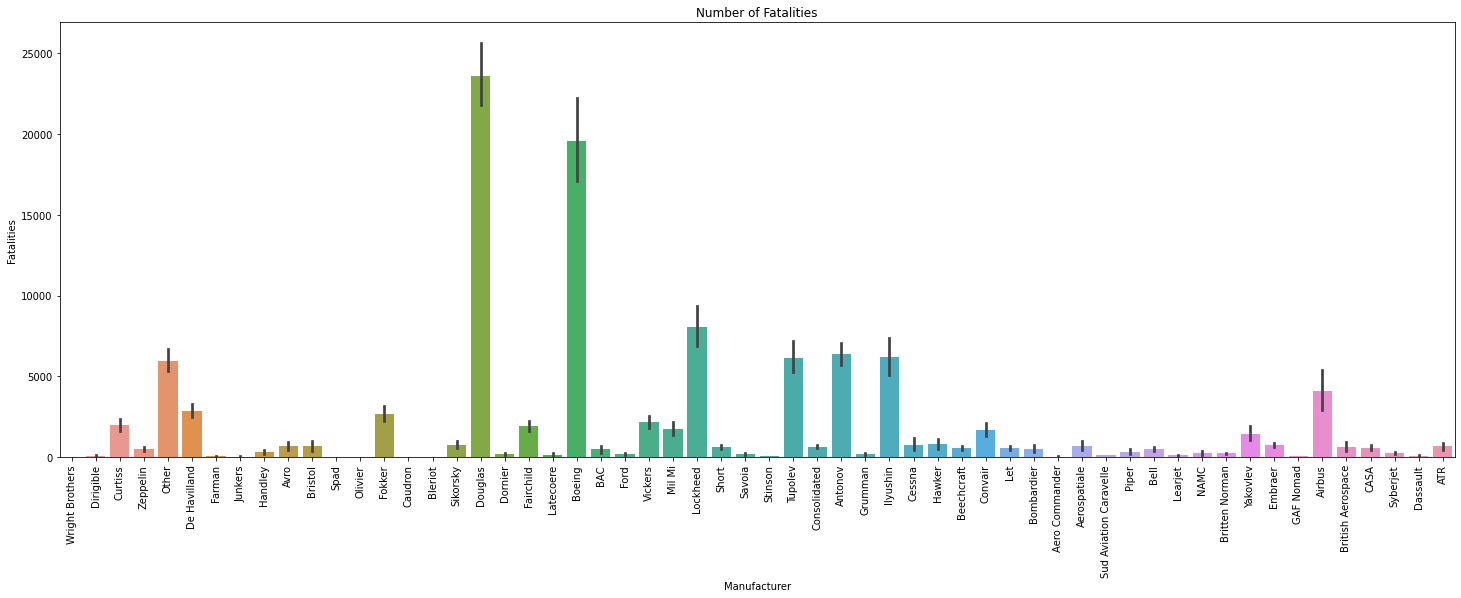

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='Manufacturer')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

plt.figure(figsize=(25,8))
ax = sns.barplot(x='Manufacturer', y='Fatalities', data=df, estimator=sum)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of Fatalities');

In [ ]:
#df['Manufacturer'].value_counts()

###Task 1.3: Categorize by Year and Time of the Day
* Use plots to visualize:
    1. plot year vs. number of chashes
    2. caterize time of failure into morning, afternoon, evening, and night based on "time".  
    * Hint: you will need to add a new column to the DB to create a new category
* plot bar or pie chart of number of crashes vs time of the day. 
* **Bonus** - Cross correlate year with type of aircraft. For example, the majority of crashes during WWII will be military. Can you identify and explain some other trends?

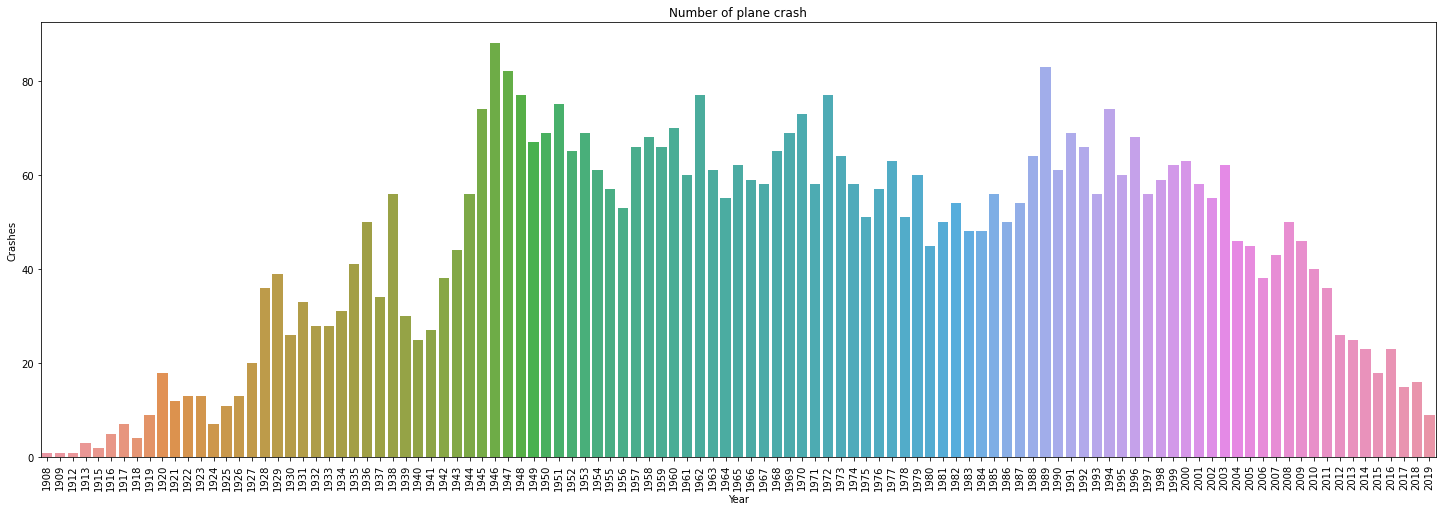

In [ ]:
df['Year'] = pd.to_datetime(df.Date).dt.year
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');



In [ ]:
douglas = df[df['Manufacturer']=='Douglas']
douglas.Manufacturer.value_counts()
#douglas.Year.value_counts()

Douglas    1107
Name: Manufacturer, dtype: int64

In [ ]:
#douglas.Summary.head(50)

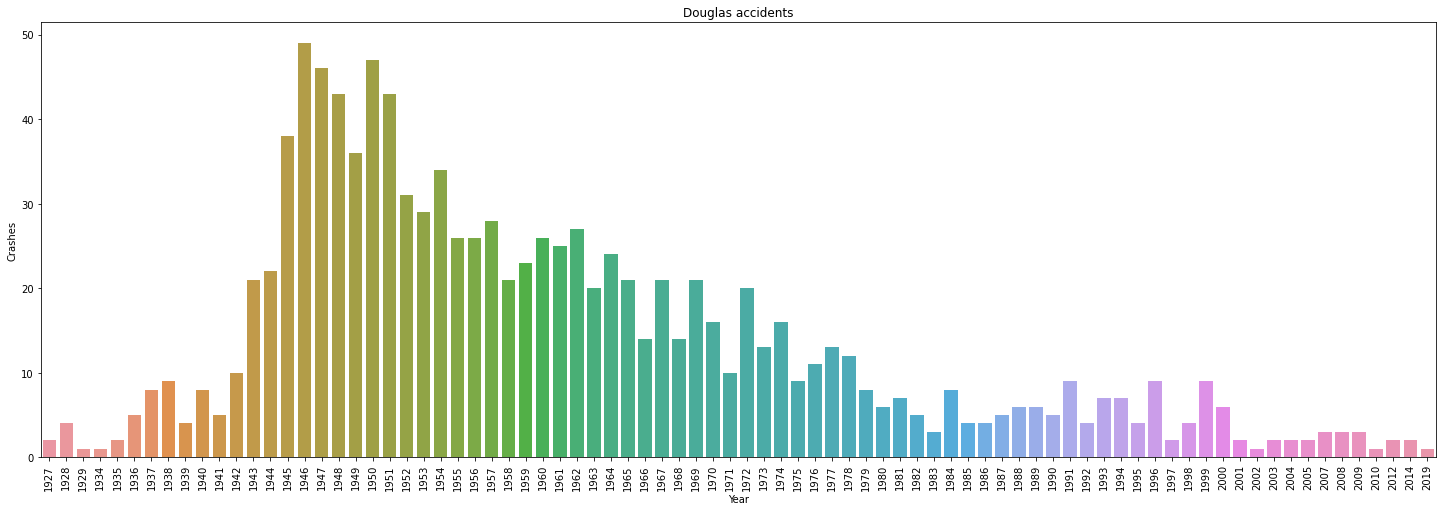

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data=douglas,x='Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Douglas accidents')
plt.ylabel('Crashes');

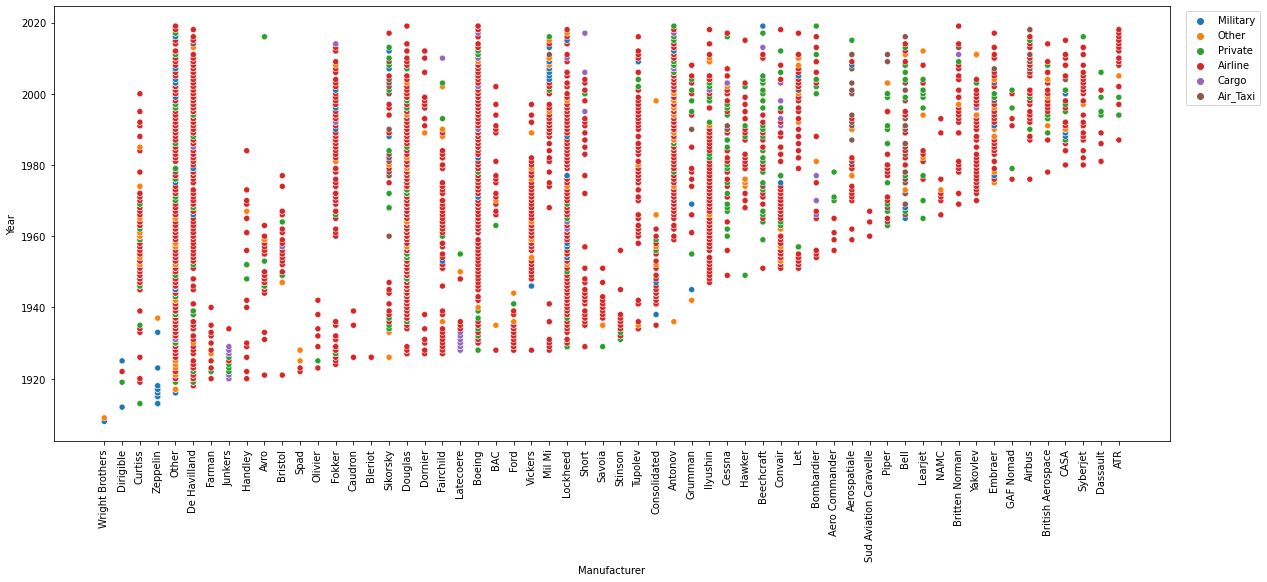

In [ ]:
var = "Year"
data = pd.concat([df["Manufacturer"],df[var]], axis=1)
plt.figure(figsize=(20,8))
sns.scatterplot(x="Manufacturer",y="Year", data=df, hue = "Operator_Category")
locs, labels=plt.xticks()
plt.setp(labels,rotation=90)
plt.legend(bbox_to_anchor=(1.01,1));

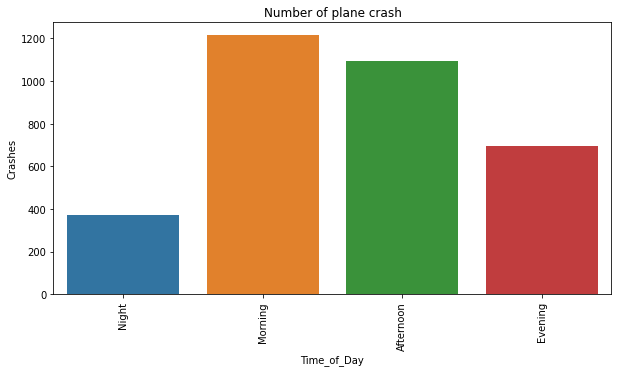

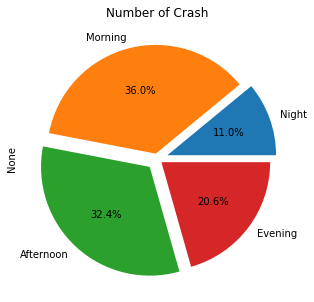

In [ ]:
bins = [0,5,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df["Hour"] = pd.to_datetime(df.Time, errors ='coerce').dt.hour
df["Time_of_Day"]=pd.cut(df["Hour"], bins, labels=labels)

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Time_of_Day')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

plt.figure(figsize=(10,5))
df.groupby("Time_of_Day").size().plot.pie(autopct='%0.1f%%',
explode=(0.1,0.05, 0.1, 0.05),title="Number of Crash")
plt.show()

In [ ]:
manu = ['Boeing', 'Airbus']
df_aircrafts = df[df["Manufacturer"].isin(manu)]

#df_aircrafts.info()

In [ ]:
#A new column was created for Boeing aircrafts with more than 3 accident for a model and Airbus aircrafts with more than 2 accident for a mode
Bng_Bus_Type = {"Boeing Vertol":["Vertol CH-47","Vertol CH-47A","Vertol CH47B","Vertol CH-47C","Vertol CH47C","Chinook HC-2","Boeing CH-47","Boeing CH47A","Chinook"],
                "Boeing 40":["Boeing 40"],
                "Boeing 95":["Boeing 95"],
                "Boeing 221":["Boeing 221"],
                "Boeing 247":["Boeing 247","Boeing 247D","B-247-D"],
                "Boeing 314":["Boeing 314A","Boeing B-314"],
                "Boeing 707":["B-707-321B", "B-707-321C","B-707-331B","707-123","707-329C","707-321CF","707-331C","707-327C","707-373","707-360C",
                              "707-327C","707-324C","707-373C","707-336C","707-351C","707-328C","707-323C","707-330C","707-3J9C","B-707-320","B-707-123B",
                              "B-707-124","B-707-328","B-707-441","B-707-121","B-707-331","B-707-321B","B-707-124","B-707-121B","B-707-131B","B-707-437",
                              "B-707-436","B-707-131","B-707-138B","B-707-328C","B-707-465","B-707-344C","B-707-321B","B-707-328B","B-707-323","B-707-3D3C",
                              "B-707-345C","B-707-31","B-707-366C","B-707-326C","B-707-340C","B-707-309C","B-707-437","B-707-379C","B-707-3B5C","B-707-338C",
                              "B-707-349C","B-707-320F","B-707(E-3B)","B-707-323C","B-707-123B","B-707-3J9C"],
               "Boeing 720":["720-030B","B-720-040B","B-720-047B","B-720-051B","B-720B-023B"],
               "Boeing 727":["727-21","727-23F","727-243F","727-24C","727-286","727-2JOF","B-727","B-727-100","B-727-113C","B-727-121C","B-727-134","B-727-193","B-727-200",
                             "B-727-21","B-727-212A","B-727-214","B-727-22","B-727-223","B-727-224","B-727-225","B-727-227","B-727-228","B-727-22QC","B-727-23","B-727-230","B-727-231",
                             "B-727-232","B-727-235","B-727-247","B-727-251","B-727-256","B-727-264","B-727-27C","B-727-281","B-727-282","B-727-286","B-727-2A7","B-727-2D3","B-727-2F2",
                             "B-727-2H9A","B-727-2L5","B-727-30","B-727-46","B-727-64","B-727-81","B-727-86","B-727-92C","B-727-95"],
               "Boeing 737":["737-8KN","737-Max 8","737-200","737-201","737-230","737-236","737-286","737-2A1C","737-2B7","737-2D6C","737-2J8C","737-2M2","737-2R4C",
                             "737-31S","737-4Q8","737-53A","737-7H4","737-809","737-8AS","737-8BK","737-8F2","737-8HG","737-MAX 8","B-737-200","B-737-204","B-737-204C",
                             "B-737-209","B-737-210C(A)","B-737-219","B-737-222","B-737-230","B-737-230A","B-737-236","B-737-241","B-737-244","B-737-247","B-737-266",
                            "B-737-270C","B-737-275","B-737-281","B-737-282","B-737-291","B-737-297","B-737-2A1","B-737-2A8","B-737-2C3","B-737-2F9","B-737-4Q8","B-737-4Y0",
                             "B-737-505","B-737-566","B-737-5L9","B-737-73V","B-737-7H4","B-737-8AL","B-737-8EH","B-737-8GP","B-737-T43","B-737-2P5","B-737-3T0"],
                "Boeing 747":["747-244B-SF","747-246F","747-249F","747-2B5F","747-412F","B-747","B-747-121","B-747-121A","B-747-122","B-747-130","B-747-131","B-747-131","B-747-131F",
                             "B-747-168B","B-747-200","B-747-209B","B-747-209BSF","B-747-230B","B-747-237B","B-747-244B","B-747-258F","B-747-283B","B-747-2B5B","B-747-2R7F","B-747-300","B-747-412",
                              "B-747-428BCF","B-747-44AF","B-747-466","B-747-48EF","B-747-SP-09","B-747-SR46"],
                "Boeing 757":["757-204","757-N23","B-757-21B","B-757-200","B-757-222","B-757-223","B-757-225","B-757-23APF"],
                "Boeing 767":["767-223ER","767-375ER","767-200ER","767-222","767-233ER","767-260ER","767-366ER","767-3Z9ER"],
                "Boeing 777":["777-200","777-236ER","777-2H6ER","777-31H","777-28EER"],
                "Boeing Flying Fortress":["B-17F","B17G","B-17G"],
                "Boeing Stratoliner":["Stratoliner"],
                "Boeing Stratofreighter":["Stratofreighter"],
                "Boeing Stratocruiser":["Stratocruiser"],
                "Boeing Stratotanker":["C-97C","C-135B","C-135A","C-97","EC-135N","EC-135k","RC-135E","RC-135S","RC-135T","KC-135A","KC-135E","KC-135C","KC-135"],
                "Boeing Superfortress":["B-29","B-29A","B-29MR","XB-29","TB-29A","RB-52B"],
                "Airbus A300":["A300", "A.300B4-203","A300B2-203","A300B4-203","A300B4-622R","A300B2-1C","A300-B4-200","A300B2-101","A300-600R","A-300-605R","A300B4-203F","A300F-622R"],
                "Airbus A310":["A310-304", "A310-324","A-310-204","Airbus A310-304","A-310-324ET","A-310-324"],
                "Airbus A320":["A320-111", "A320-231","A320-211","A.320-214","A320-212","A-320-233","A320-232","A320-214","A-320-216"],
                "Airbus A321":["A321-231","A321-111"],
                "Airbus A330":["A330-321","A.330-301","A-330-243","A330-203","A330-202"],
                "Airbus A340":["A-340"],
                "Airbus Helicopter":["Eurocopter"]
  }

for air_cat in Bng_Bus_Type:
  filter=df_aircrafts["AC_Type"].str.contains('|'.join(Bng_Bus_Type[air_cat]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Aircraft_Model"] = air_cat


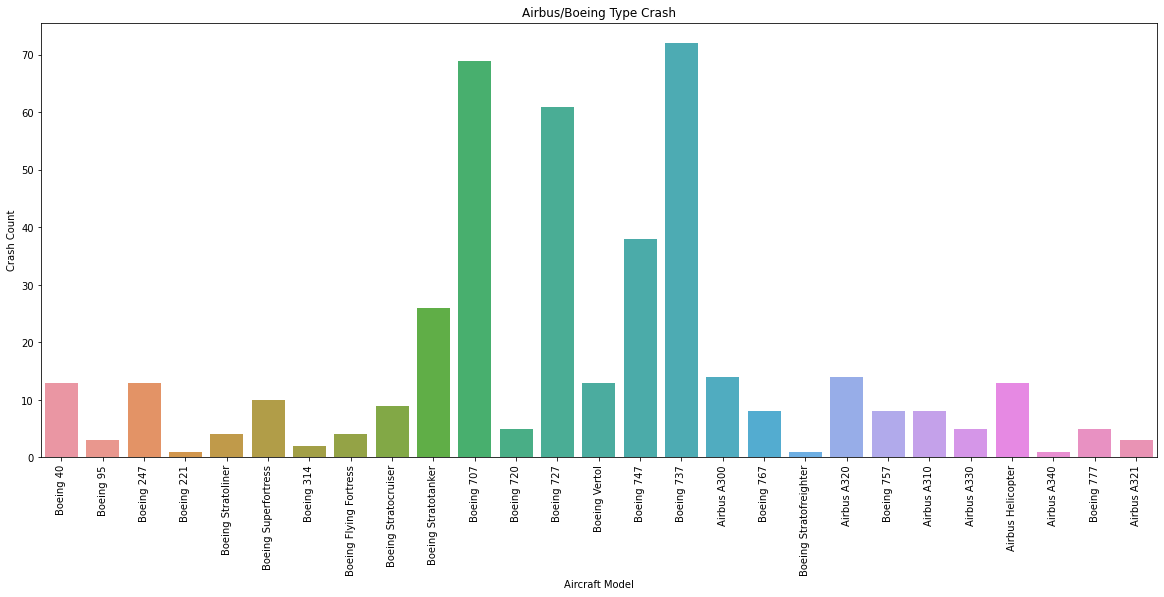

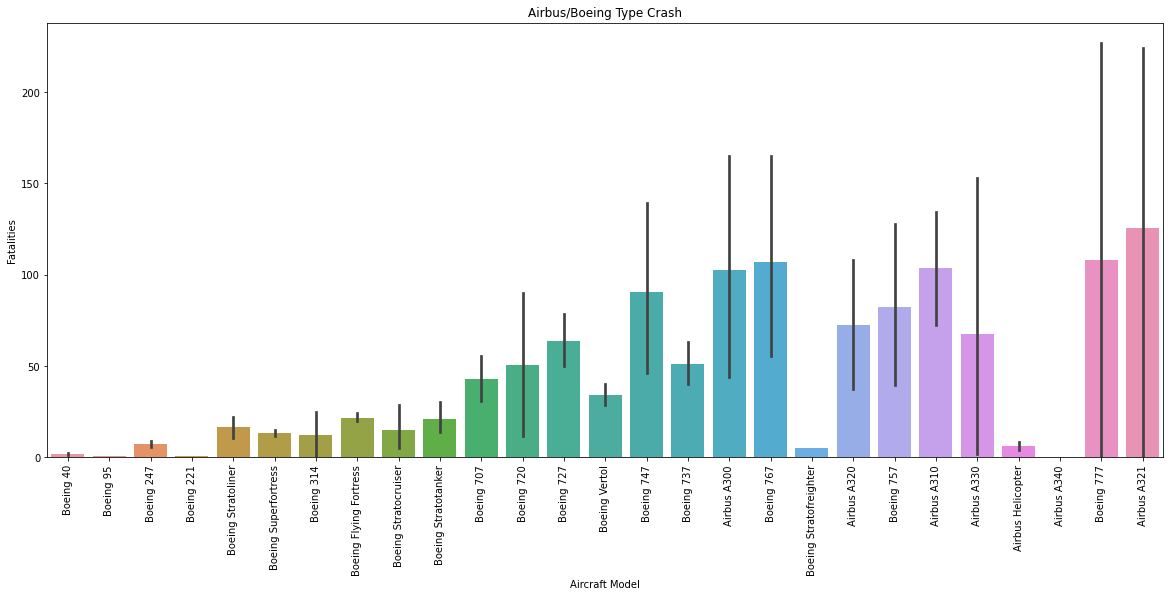

In [ ]:
#df_aircrafts.Manufacturer.tail(100)

#Crash of aircrafts model 
plt.figure(figsize=(20,8))
sns.countplot(data=df_aircrafts, x='Aircraft_Model')
plt.xticks(rotation=90)
plt.title('Airbus/Boeing Type Crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Crash Count');

plt.figure(figsize=(20,8))
sns.barplot(data=df_aircrafts, x='Aircraft_Model', y = 'Fatalities')
plt.xticks(rotation=90)
plt.title('Airbus/Boeing Type Crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Fatalities');

In [ ]:
df_aircrafts.groupby('Manufacturer').Aircraft_Model.value_counts()

Manufacturer  Aircraft_Model        
Airbus        Airbus A300               14
              Airbus A320               14
              Airbus Helicopter         13
              Airbus A310               8 
              Airbus A330               5 
              Airbus A321               3 
              Airbus A340               1 
Boeing        Boeing 737                72
              Boeing 707                69
              Boeing 727                61
              Boeing 747                38
              Boeing Stratotanker       26
              Boeing 247                13
              Boeing 40                 13
              Boeing Vertol             13
              Boeing Superfortress      10
              Boeing Stratocruiser      9 
              Boeing 757                8 
              Boeing 767                8 
              Boeing 720                5 
              Boeing 777                5 
              Boeing Flying Fortress    4 
              Boe

In [ ]:
df_aircrafts.groupby(['Manufacturer'])['Aboard'].sum()

Manufacturer
Airbus    7025.0 
Boeing    31577.0
Name: Aboard, dtype: float64

In [ ]:
df_aircrafts.groupby(['Manufacturer'])['Fatalities'].sum()

Manufacturer
Airbus    4072.0 
Boeing    19547.0
Name: Fatalities, dtype: float64

In [ ]:
df_aircrafts.groupby(['Aircraft_Model'])['Fatalities'].sum()

Aircraft_Model
Airbus A300               1435.0
Airbus A310               828.0 
Airbus A320               1015.0
Airbus A321               377.0 
Airbus A330               339.0 
Airbus A340               0.0   
Airbus Helicopter         78.0  
Boeing 221                1.0   
Boeing 247                96.0  
Boeing 314                25.0  
Boeing 40                 23.0  
Boeing 707                2968.0
Boeing 720                254.0 
Boeing 727                3876.0
Boeing 737                3668.0
Boeing 747                3441.0
Boeing 757                657.0 
Boeing 767                855.0 
Boeing 777                540.0 
Boeing 95                 3.0   
Boeing Flying Fortress    87.0  
Boeing Stratocruiser      136.0 
Boeing Stratofreighter    5.0   
Boeing Stratoliner        67.0  
Boeing Stratotanker       546.0 
Boeing Superfortress      132.0 
Boeing Vertol             446.0 
Name: Fatalities, dtype: float64

In [ ]:
airbus = df_aircrafts[df_aircrafts['Manufacturer']=='Airbus']
airbus_model = airbus.groupby(["Aircraft_Model"])
#airbus_model["Year"].value_counts()

In [ ]:
airbus_fatalities = airbus.Fatalities.sum()/airbus.Aboard.sum()*100
print(airbus_fatalities.round(2))
airbus.Fatalities.sum()

57.96


4072.0

In [ ]:
airbus.Aboard.sum()

7025.0

In [ ]:
boeing = df_aircrafts[df_aircrafts['Manufacturer']=='Boeing']
boeing_model = boeing.groupby(["Aircraft_Model"])
#boeing_model["Year"].value_counts().head(100)


In [ ]:
#b_737 = df_aircrafts[df_aircrafts["Aircraft_Model"]=="Boeing 737"]
#b_737["Year"].value_counts().sum()

In [ ]:
#b_707 = df_aircrafts[df_aircrafts["Aircraft_Model"]=="Boeing 707"]
#b_707["Year"].value_counts().sum()

In [ ]:
boeing_fatalities = (boeing.Fatalities.sum()/boeing.Aboard.sum())*100
print(boeing_fatalities.round(2))
boeing.Fatalities.sum()


61.9


19547.0

In [ ]:
boeing.Aboard.sum()

31577.0

In [ ]:
total_fatality=df_aircrafts.Fatalities.sum()
total_fatality

23619.0

In [ ]:
total_aboard=df_aircrafts.Aboard.sum()
total_aboard

38602.0

In [ ]:
fatality_pct = total_fatality/total_aboard*100
fatality_pct.round(2)

61.19

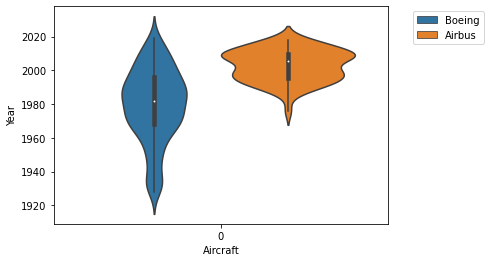

In [ ]:
df_aircrafts["Aircraft"] = 0
sns.violinplot(data = df_aircrafts, x="Aircraft", y ="Year",hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.3,1));

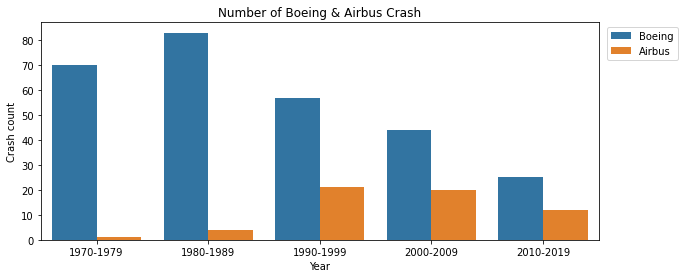

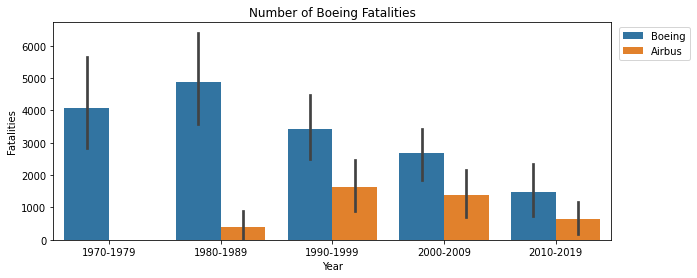

In [ ]:
Aircraft_bins = [1970,1980,1990,2000,2010,2020]
labels = ["1970-1979","1980-1989","1990-1999","2000-2009","2010-2019"]
df_aircrafts["Decade"]=pd.cut(df_aircrafts.Year,Aircraft_bins,labels=labels)


#Number of Boeing and Airbus Crash
plt.figure(figsize=(10,4))
sns.countplot(data=df_aircrafts,x='Decade', hue='Manufacturer')
plt.title('Number of Boeing & Airbus Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(1.15,1));


#Boeing and Airbus Fatalities
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Decade', y='Fatalities', data=df_aircrafts, estimator=sum, hue='Manufacturer')
plt.title('Number of Boeing Fatalities')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.15,1));

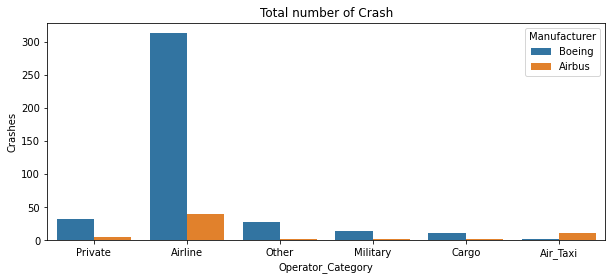

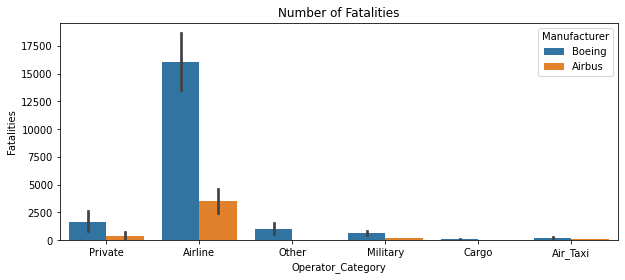

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_aircrafts,x='Operator_Category', hue='Manufacturer')
plt.title('Total number of Crash')
plt.ylabel('Crashes');

#Total number of fatalities for each operator category
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Operator_Category', y='Fatalities', data=df_aircrafts, estimator=sum, hue='Manufacturer')
plt.title('Number of Fatalities');

###Task 1.4: Perform EDA 
* Read the Advanced exploratory data analysis (EDA) with Python: https://medium.com/p/536fa83c578a
* Apply EDA on your dataset.
  * What else does the EDA tell you about dataset?

In [ ]:
df_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 145 to 4961
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   455 non-null    object  
 1   Time                   398 non-null    object  
 2   Location               455 non-null    object  
 3   Operator               455 non-null    object  
 4   Flight_#               273 non-null    object  
 5   Route                  414 non-null    object  
 6   AC_Type                455 non-null    object  
 7   Registration           441 non-null    object  
 8   cn/ln                  416 non-null    object  
 9   Aboard                 454 non-null    float64 
 10  Aboard_Passangers      439 non-null    float64 
 11  Aboard_Crew            439 non-null    float64 
 12  Fatalities             455 non-null    float64 
 13  Fatalities_Passangers  438 non-null    float64 
 14  Fatalities_Crew        438 non-null    

In [ ]:
df_aircrafts=df_aircrafts.drop(['Aircraft'], axis = 1)

In [ ]:
#missing values
total = df_aircrafts.isnull().sum().sort_values(ascending=False)
percent=(df_aircrafts.isnull().sum()/df_aircrafts.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(17)

,Total,Percent
Flight_#,182,40.000000
Decade,118,25.934066
Route_Coordinates,88,19.340659
Time_of_Day,68,14.945055
Coordinates,68,14.945055
Hour,60,13.186813
Time,57,12.527473
Route,41,9.010989
cn/ln,39,8.571429
Aircraft_Model,32,7.032967


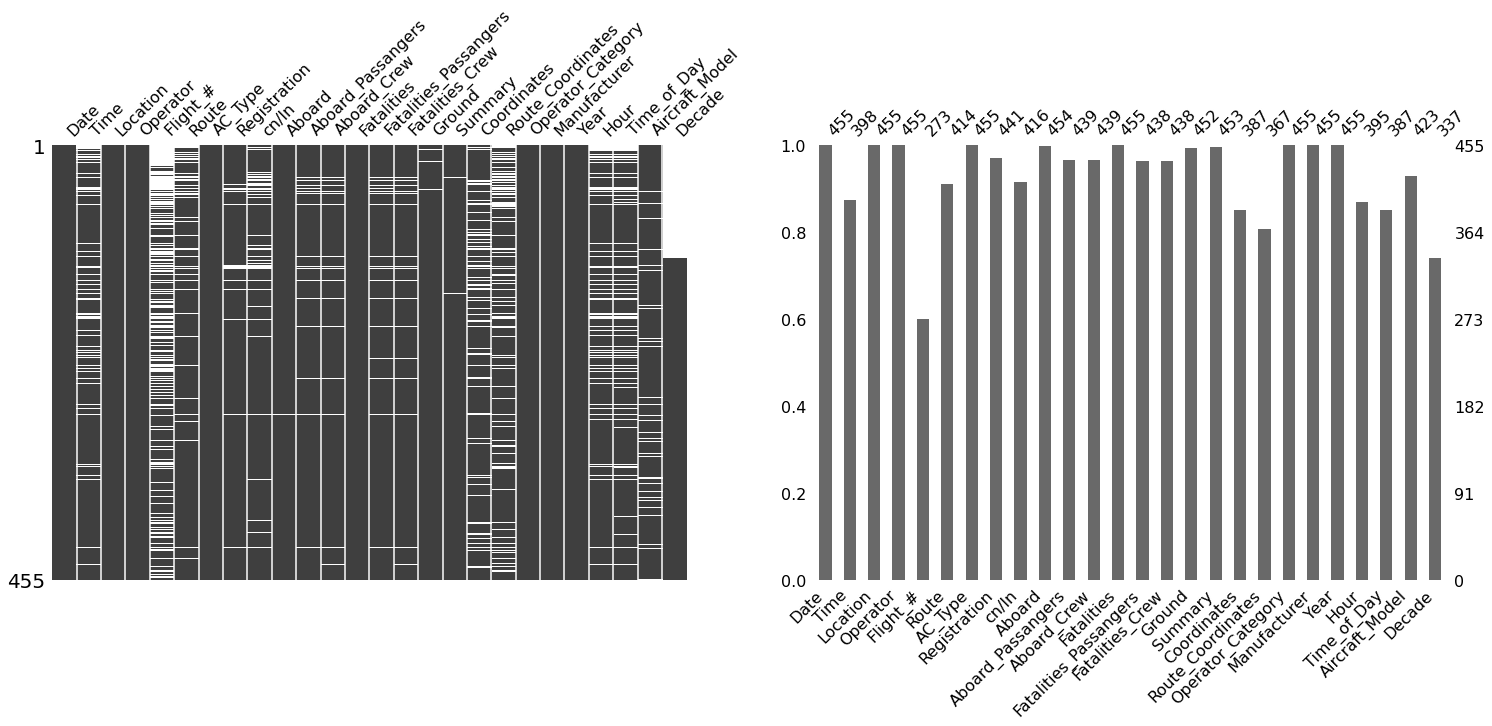

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(25, 8))
msno.matrix(df_aircrafts, labels=True,ax=axs[0],figsize=(10, 4));
msno.bar(df_aircrafts, labels=True,ax=axs[1],figsize=(10, 4));
plt.show()

In [ ]:
#investigation of non-numeric variables 
df_aircrafts.describe(exclude="number")

,Date,Time,Location,Operator,Flight_#,Route,AC_Type,Registration,cn/ln,Summary,Coordinates,Route_Coordinates,Operator_Category,Manufacturer,Time_of_Day,Aircraft_Model,Decade
count,455,398,455,455,273,414,455,441,416,453,387,367,455,455,387,423,337
unique,448,303,419,227,242,385,346,441,415,453,326,358,6,2,4,27,5
top,09/11/2001,15:30,"San Francisco, California",Military - U.S. Air Force,006,Training,Boeing 40,NC280,1044,The air mail plane crashed into a grove of cottonwood trees and burned. Businessman F.H. Craig was killed and pilot Frank Yegar injured. The pilot descended in altitude due to air pockets.The plane then ran into an air pocket that brought the plane down into the grove of trees.,"(Manila, Capital District, Metro Manila, Philippines, (14.5948914, 120.9782618))","[(Taipei, Taiwan, (25.0375198, 121.5636796)), (Los Angeles, Los Angeles County, California, United States, (34.0536909, -118.242766))]",Airline,Boeing,Morning,Boeing 737,1980-1989
freq,4,5,4,33,3,16,13,1,2,1,5,2,352,397,138,72,87


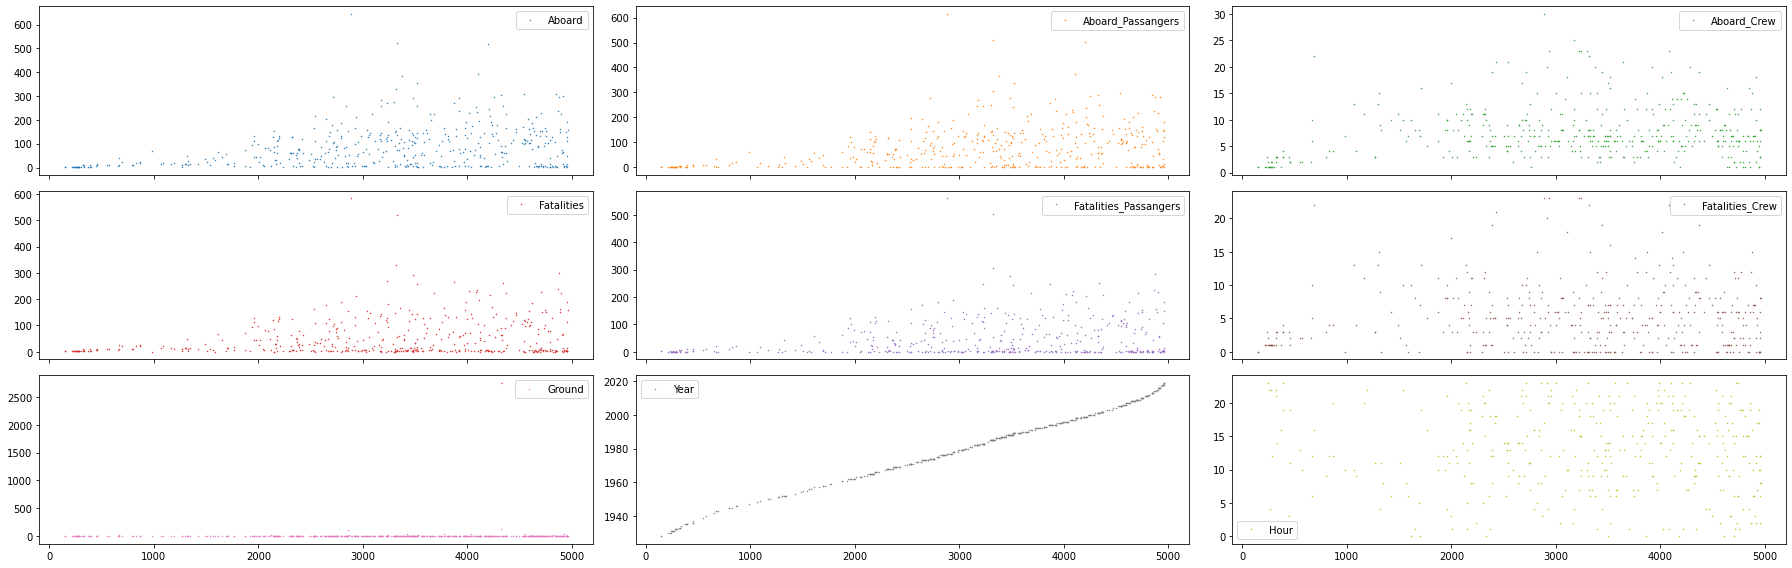

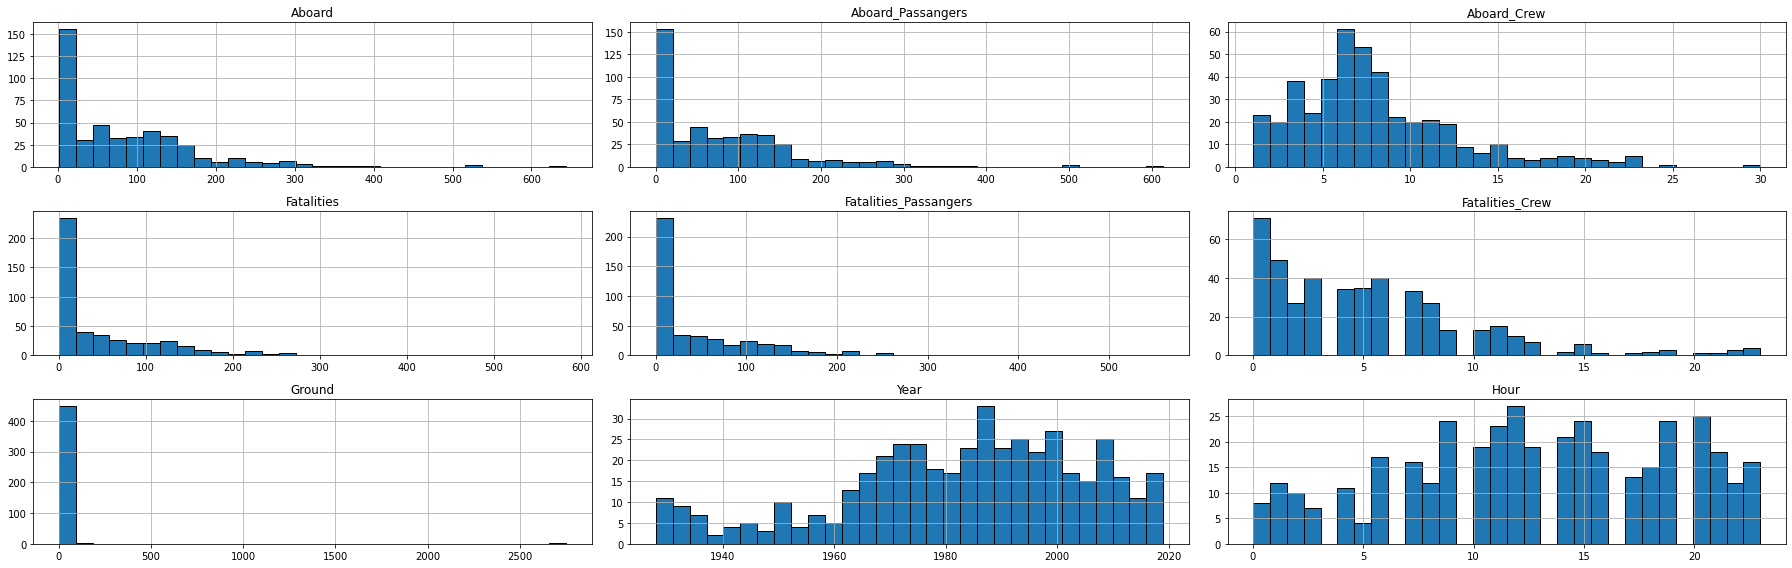

In [ ]:
#global view of numeric variables of the dataset
df_aircrafts.plot(lw=0,marker=".",subplots=True,layout=(3,3),figsize=(25,8),markersize=1)
plt.tight_layout();

#plot histogram to detect outliers
df_aircrafts.hist(bins=30, figsize=(25, 8), layout=(3,3), edgecolor="black")
plt.tight_layout();
#an outlier was detected in the Ground variable, which is related to the 9/11 incident


In [ ]:
#investigation of numeric variables
df_aircrafts.describe(include = "number")

,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Year,Hour
count,454.000000,439.000000,439.000000,455.000000,438.000000,438.000000,452.000000,455.000000,395.000000
mean,85.026432,78.753986,7.717540,51.909890,47.972603,5.221461,13.617257,1982.690110,12.800000
std,88.261748,85.575802,4.825014,71.975052,69.851914,4.783055,182.857552,21.888348,6.206923
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1928.000000,0.000000
25%,12.000000,5.000000,5.000000,4.000000,0.000000,1.000000,0.000000,1969.000000,9.000000
50%,63.500000,58.000000,7.000000,16.000000,12.000000,4.000000,0.000000,1986.000000,13.000000
75%,129.750000,124.000000,10.000000,82.500000,79.750000,7.000000,0.000000,1999.000000,18.000000
max,644.000000,614.000000,30.000000,583.000000,560.000000,23.000000,2750.000000,2019.000000,23.000000


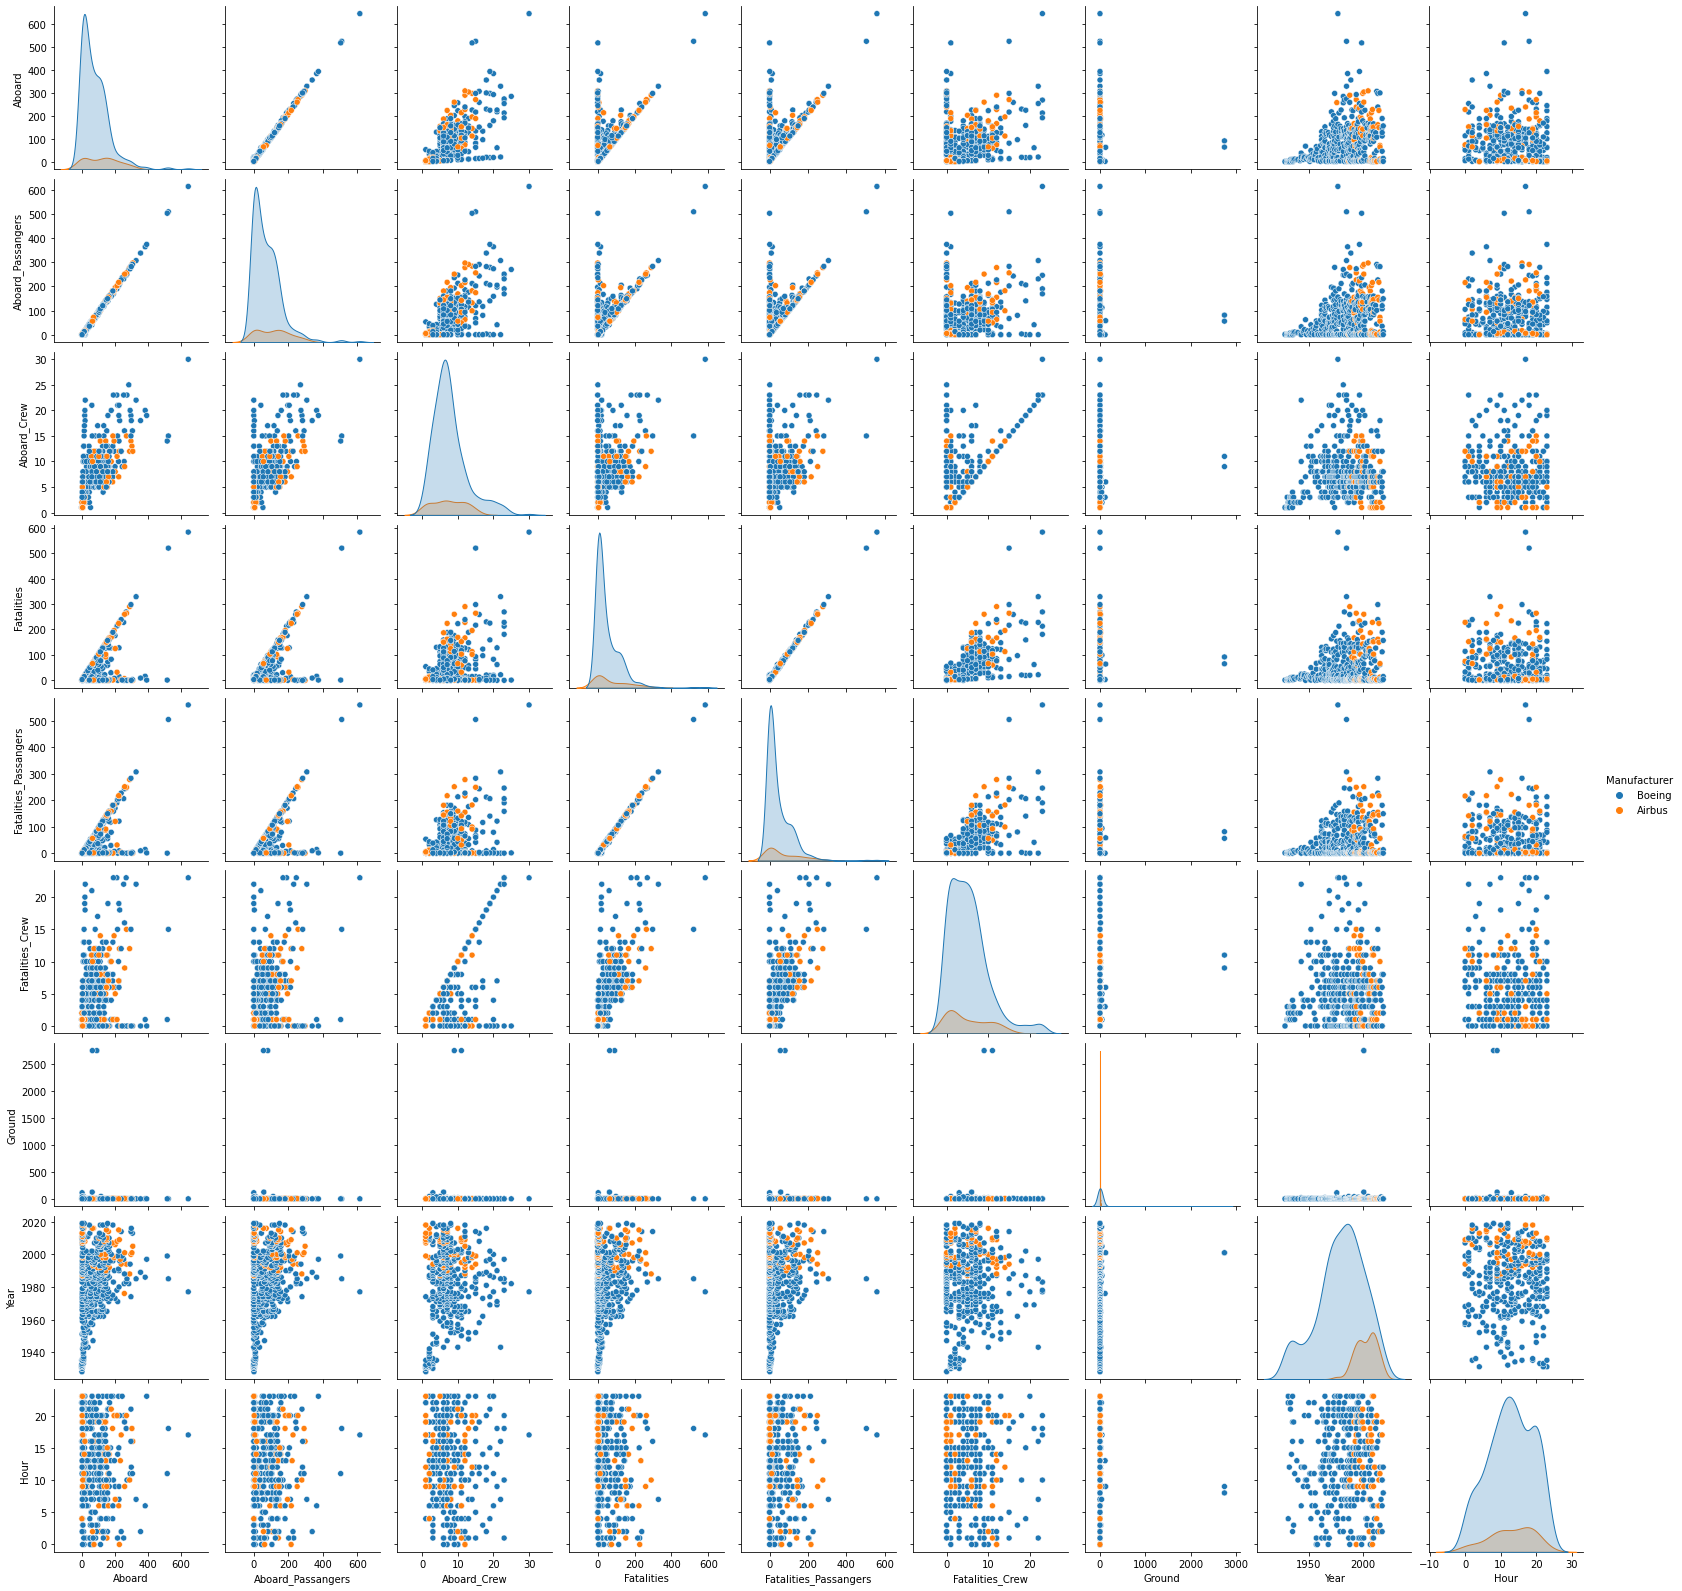

In [ ]:
#visualise relationship between numerical variables with Operator Category as the target variable
sns.pairplot(df_aircrafts, hue='Manufacturer');

In [ ]:
df_aircrafts=df_aircrafts.drop(['Aboard_Passangers','Aboard_Crew','Fatalities_Crew','Fatalities_Passangers','Ground'], axis = 1)

## Task 2: Implement Text Search Analysis
* Implement a text search function that can search for key words in the "summary" and provide all instances that reference the words you are searching for. 
* List all aircraft that crashed due to: 
    1. weather (search by rain, storm..etc), 
    2. shot in combat (search shot)
    3. collision (search collide, collision...)
    4. approach/landing
* **Bonus**:
    * Think of your own categories. What would be useful and why? 
    * Correlate 2 or more keywords. 
* Discuss results, produce graphs or charts if nessary to support your discussion.

referenece: 
https://www.kaggle.com/del=3f79407a7fc1ab98/text-analysis-for-aircraft-crashes-causes/notebook

In [ ]:
df_aircrafts.Summary.head(100)

145     The air mail plane crashed into a grove of cottonwood trees and burned. Businessman F.H. Craig was killed and pilot Frank Yegar injured. The pilot descended in altitude due to air pockets.The plane then ran into an air pocket that brought the plane down into the grove of trees.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
147     Spatial disorientation after entering a snowstorm.                                                                                                                                                                                                           

In [ ]:
df_aircrafts["Crash_Cause"]="Unknown"
cause_cats={"Weather":["rain*","storm*","snowstorm*","wind","severe weather","thunderstorm*","turbulence","weather related","haze","weather was poor",
                       "lightning","fog","wind sheer","icing","weather condition*","foggy","headwinds","snow","sunstroke","poor weather","poor weater","inclement weather",
                       "bad weather","low altitude","poor visibility","low visibility","heavy rain*","low cloud*","blizzard","low overcast","mountain wave","downdrafts"],
            "Combat":["shot down","combat","hit by","heavy fighting","shot it"],
            "Collision":["collide","collision"],
            "Unknown":["unknown","never found"],
            "Collision":["Midair collision", "midair collision","collided","collision","impacted"],
            "Pilot_Error":["Pilot error","Negligence","stunting","stunting","standard route","IFR flight","adhere","low pass","opioids",
                           "flight path","intoxicated","pilot's decision","fatigued","disorientation","request bearings"],
            "Technical_Fault":["controls jambed","engine failure","fuel supply","technical problem*","hydraulics","hydraulic failure","experienced a fire","stick shaker","pressure system",
                                 "engine trouble","asymetric fuel","ATC lost radar","Exploded","lost power","losing power","malfunction in the engine","navigation equipment",
                                 "fire erupted","fuel exhaustion","structural failure","tailspin","training","starboard","broken wing strut","broken wire",
                                 "engine fire","engine failed","flight fire","faulty design","malfunctioning controls","engine problem*","propeller","mayday",
                                 "test","hydrogen gas","caught fire","flutter","lost contact","mechanical problem*","distress call","out of fuel","rotor separating","aircraft stalled",
                               "engine * fire", "experimental","refueling","lost control","minor problem*","reported a fire", "triggered","steering hardware","improper loading",
                               "fuel system","autorotation","declared an emergency","fuselage failure","plane stalled","ocillation","erroneous","stalled condition",
                               "wing separated","difficulties","mechanical difficulties","detached","sufficient speed","vertical bank","engine faiure","all engines"],
            "Landing":["emergency landing","landing gear","descent","go-around","lost height","while landing","run off","swamp","attempting to land","attempted to land",
                       "attemptting to land","losing altitude","hard landing","circling"],
            "Takeoff":["approach","takeoff","attempting to take off","taking off","gain* altitude","gaining altitude","lost altitude","take off","took off","liftoff"]
         }

for cause in cause_cats:
  filter=df_aircrafts["Summary"].str.contains('|'.join(cause_cats[cause]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Crash_Cause"] = cause

In [ ]:
airbus_cause = df_aircrafts[df_aircrafts['Manufacturer']=='Airbus']
boeing_cause = df_aircrafts[df_aircrafts['Manufacturer']=='Boeing']

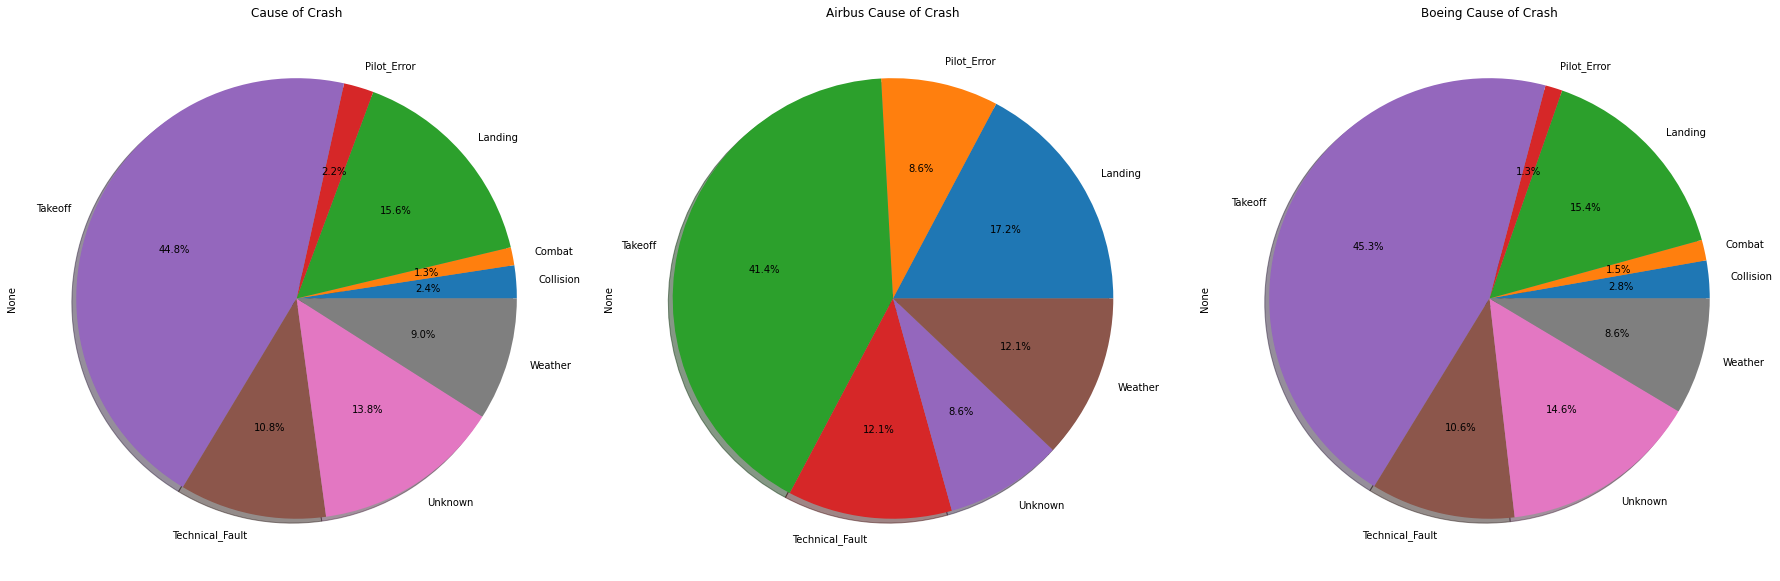

In [ ]:
fig, axs = plt.subplots(1,3 ,figsize=(25, 8))
df_aircrafts.groupby("Crash_Cause").size().plot.pie(ax=axs[0],autopct='%0.1f%%',shadow=True,  title="Cause of Crash")
airbus_cause.groupby("Crash_Cause").size().plot.pie(ax=axs[1],autopct='%0.1f%%',shadow=True,  title="Airbus Cause of Crash")
boeing_cause.groupby("Crash_Cause").size().plot.pie(ax=axs[2],autopct='%0.1f%%',shadow=True,  title="Boeing Cause of Crash")
plt.tight_layout()
plt.show()

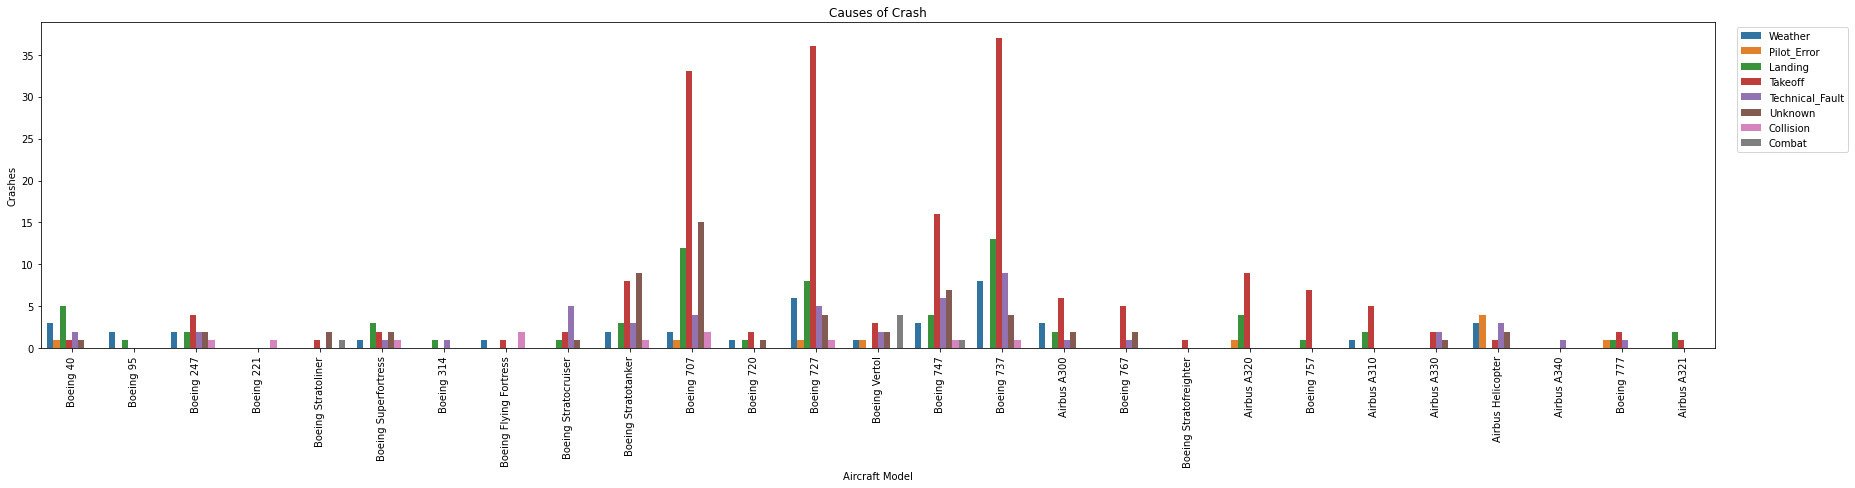

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(data=df_aircrafts,x='Aircraft_Model', hue='Crash_Cause')
plt.title('Causes of Crash')
plt.xticks(rotation=90)
plt.xlabel('Aircraft Model')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1.01,1));

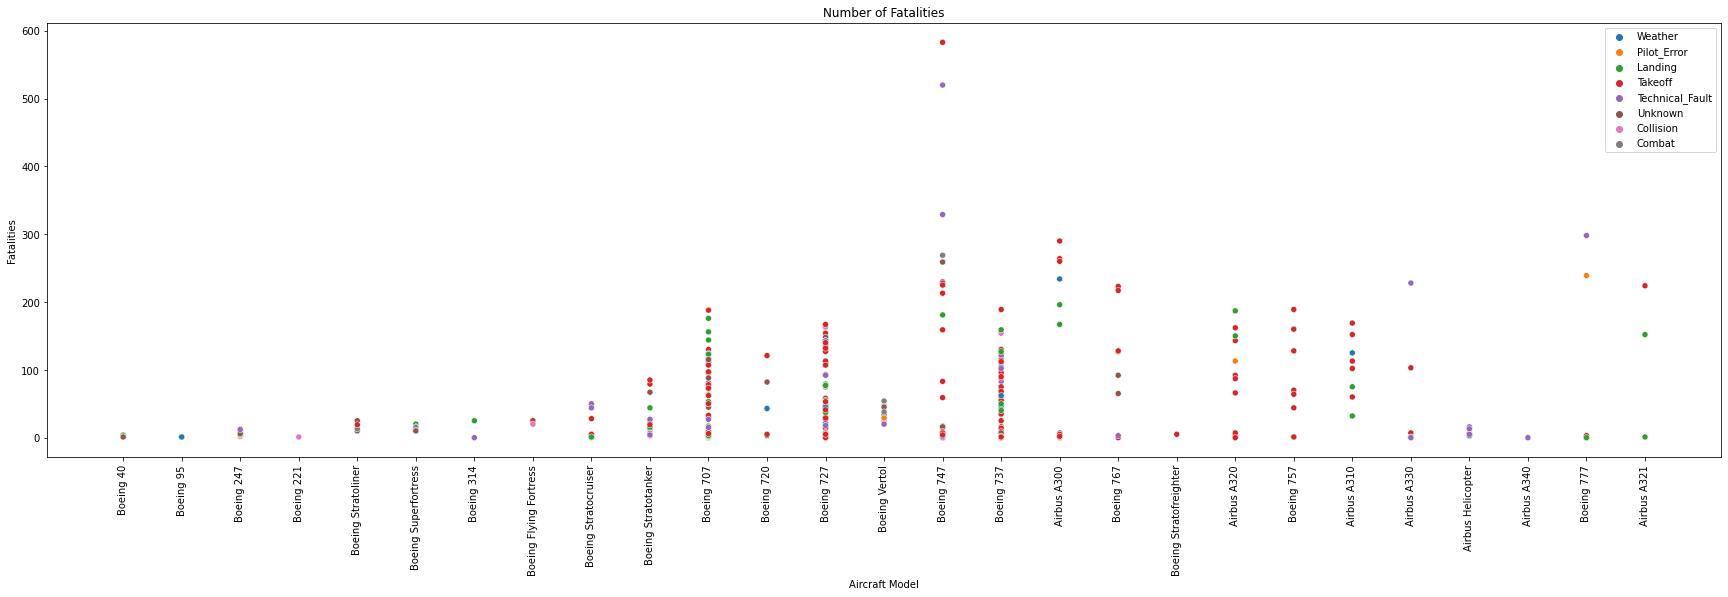

In [ ]:
plt.figure(figsize=(30,8))
ax = sns.scatterplot(x='Aircraft_Model', y='Fatalities', data=df_aircrafts, hue='Crash_Cause')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0,1))
plt.xlabel('Aircraft Model')
plt.title('Number of Fatalities');

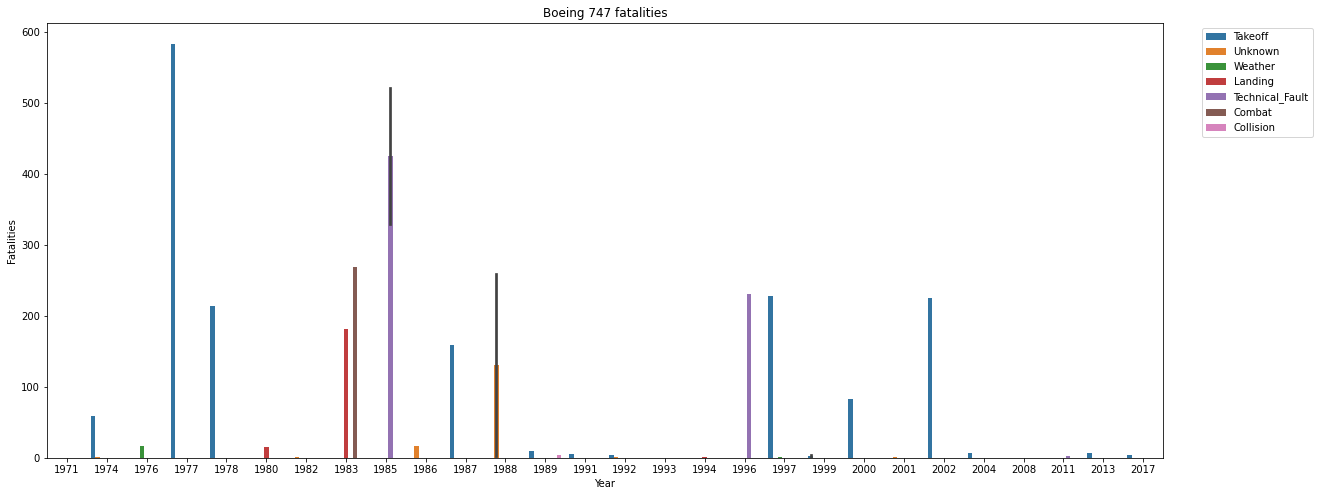

In [ ]:
df_boeing747 = df_aircrafts.loc[df_aircrafts["Aircraft_Model"]=="Boeing 747"]

plt.figure(figsize=(20,8))
ax = sns.barplot(x='Year', y='Fatalities', data=df_boeing747, hue='Crash_Cause')
plt.legend(bbox_to_anchor=(1.03,1))
plt.xlabel('Year')
plt.title('Boeing 747 fatalities');

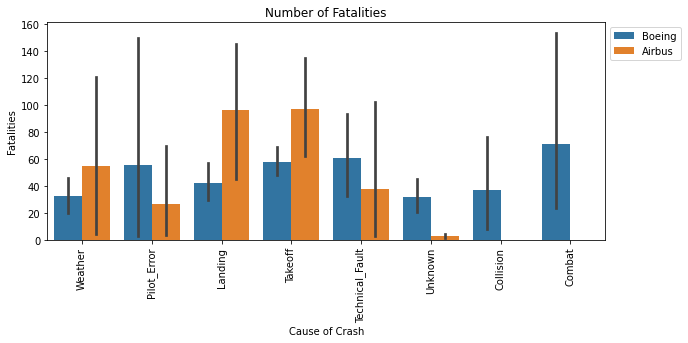

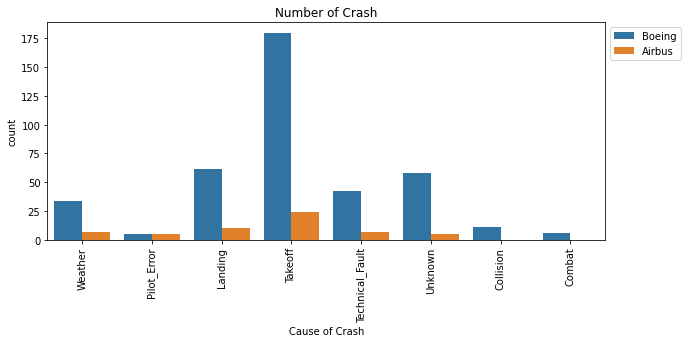

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Crash_Cause', y='Fatalities', data=df_aircrafts, hue='Manufacturer')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Cause of Crash')
plt.title('Number of Fatalities');




plt.figure(figsize=(10,4))
ax = sns.countplot(x='Crash_Cause', data=df_aircrafts, hue='Manufacturer')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Cause of Crash')
plt.title('Number of Crash');

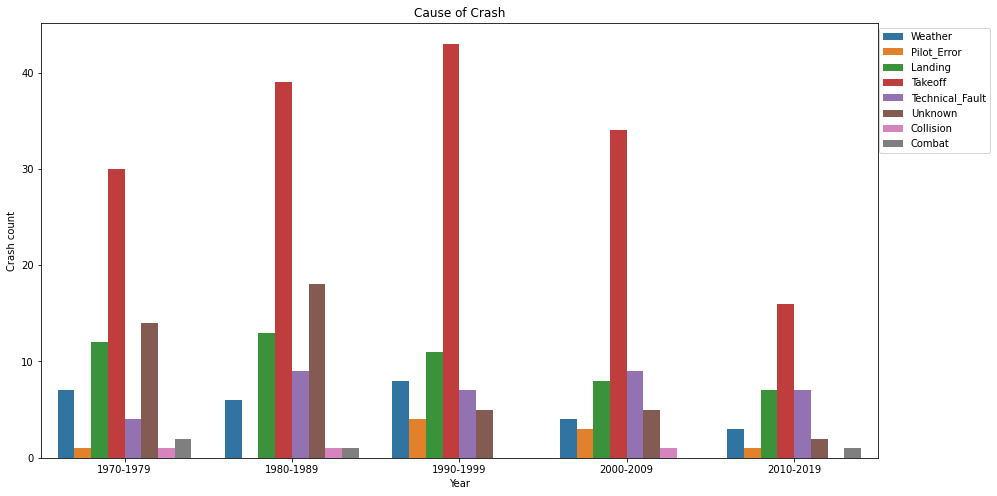

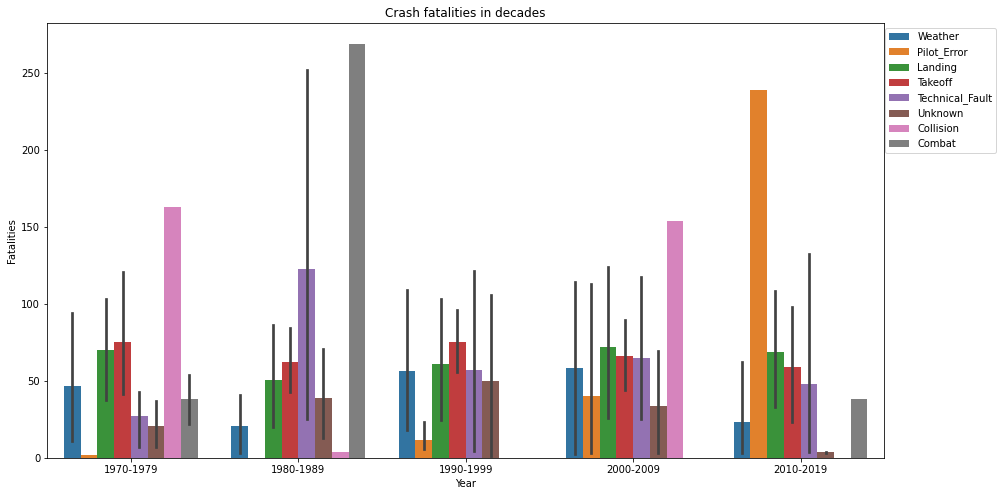

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_aircrafts,x='Decade', hue='Crash_Cause')
plt.title('Cause of Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(1.14,1));



plt.figure(figsize=(15,8))
ax = sns.barplot(x='Decade', y='Fatalities', data=df_aircrafts, hue="Crash_Cause")
plt.title('Crash fatalities in decades')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend(bbox_to_anchor=(1.14,1));

In [ ]:
x=len(df_aircrafts)
p_airbus=(df_aircrafts['Manufacturer']=='Airbus').sum()/x
p_boeing=(df_aircrafts['Manufacturer']=='Boeing').sum()/x
p_weather=(df_aircrafts['Crash_Cause']=='Weather').sum()/x
p_tf=(df_aircrafts['Crash_Cause']=='Technical_Fault').sum()/x

In [ ]:
print('The probability of airbus accident caused by weather is {}%'.format(100*round(p_airbus * p_weather, 4)))
print('The probability of airbus accident caused by technical fault is {}%'.format(100*round(p_airbus * p_tf,4)))
print('The probability of boeing accident caused by weather is {}%'.format(100*round(p_boeing * p_weather,4)))
print('The probability of boeing accident caused by technical fault is {}%'.format(100*round(p_boeing * p_tf, 3)))

The probability of airbus accident caused by weather is 1.15%
The probability of airbus accident caused by technical fault is 1.37%
The probability of boeing accident caused by weather is 7.86%
The probability of boeing accident caused by technical fault is 9.4%


In [ ]:
#df_aircrafts.info()

## Task 3: Plot Crash on Map


### Task 3.1: Plot Location of the crash on the map
* Plot location of all crashes on the mapG
* Generate heat map based on frequency of crash occurances 
* Cluster area of high crash occurance and categorize them from highest to lowes
* Generate heat map based on the number of fatalities
  * How does it compare to the heat map in 2nd bullet? 
* **Bonus**: Think of your own idea and implement it. What would be useful to add to the map view and why?
* **Hint**: You will first need to convert the "Location" column to longitude and latitude coordinates. Feel free to use any library for this task. However, one way to do this is to use the "geopy" library. 
Note: Geopy does require you to create an account. 

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/DenisCarriere/geocoder
%cd geocoder


fatal: destination path 'geocoder' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/geocoder/geocoder


In [ ]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
%pip install --upgrade folium

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from folium import plugins
folium.__version__

'0.12.1.post1'

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)

In [ ]:
df_aircrafts["latitude"]=df_aircrafts["Coordinates"].apply(lambda loc: loc.latitude if isinstance(loc, geopy.location.Location) else None)
df_aircrafts["longitude"]=df_aircrafts["Coordinates"].apply(lambda loc: loc.longitude if isinstance(loc, geopy.location.Location) else None)

In [ ]:
df_aircrafts.dropna(subset=['latitude','longitude'], inplace = True)

In [ ]:
m = folium.Map([13.752544, 100.493473], tiles = 'stamen terrain', zoom_start=5)
mc = MarkerCluster().add_to(m)

In [ ]:
for i, row in df_aircrafts.iterrows():

  lat = df_aircrafts.at[i,'latitude']
  lon = df_aircrafts.at[i,'longitude']
  crash_site = df_aircrafts.at[i, 'Location']

  if row["Manufacturer"]=="Boeing":

    symbol=folium.Icon(color="blue", icon = "plane", prefix = "fa")
  else:
    symbol = folium.Icon(color="red", icon = "plane", prefix ="fa" )

  folium.Marker(location=[lat,lon],popup=crash_site, tooltip="click", icon = symbol).add_to(mc)


In [ ]:
m

In [ ]:
m = folium.Map([13.752544, 100.493473], tiles = 'stamen terrain', zoom_start=5)

maps = df_aircrafts[['latitude', 'longitude', 'Fatalities']]

heat_map = [[row['latitude'], row['longitude'], row['Fatalities']]for index, row in maps.iterrows()]

HeatMap(heat_map).add_to(m)

In [ ]:
m

###Task 3.2: Plot Trajectories/Routes on Map
* Plot trajectories and routes
* Annotate with the AC registration 
* **Bonus**: Make it selectable such that you can pick such that the use can pick: date range, AC type, operator, registration

Note: If you cannot do it for the entire dataset. Choose a smaller subset.

In [ ]:
def draw_route(df_aircrafts):
  map = folium.Map([0, 0], zoom_start=2, control_scale=True, tiles ='stamen terrain')
  colorCode_AC={"Boeing":"red","Airbus":"blue"}
  for i,row in df_aircrafts.iterrows():
    if isinstance(row["Route_Coordinates"], list):
      tooltip=f'Route: {row["Route"]}'
      popup=f'Date: {row["Date"]}\n\nAC_Type: {row["AC_Type"]}'
      color=colorCode_AC.get(row["Manufacturer"],"green")
      plugins.AntPath([(x.latitude,x.longitude) for x in row["Route_Coordinates"]], color=color,tooltip=tooltip,popup=popup, weight=2, opacity=0.5).add_to(map)
  return map

In [ ]:
map=draw_route(df_aircrafts.tail(100))
map

###Task 3.3: Correlation Location and Weather 
* For each region identify what the key weather words are. 
* Are there some areas that have more crashses due to weather? 
* Can you identify what type of weather? (rain, winds...etc).
* Create confusion matrix (x-weather and y-location)
* **Bonus**: Correlate location with other "key words" (i.e. departure, pilot error..etc)

Note: this part requires combining task 2 and task 3

In [ ]:

region={"Africa":["Egypt","Egyptian", "Nigeria", "Kenya", "Morocco", "Zambia", "Angola", "Cameroon", "Ivory Coast", "Mauritius", "Ethiopia", "Libya", "Comoros", "Congo", "Tunisia", "Bangui", "Algeria",
                  "Sudan", "Benin", "Ghana", "Uganda", "Somalia"],
            "North America":["Nebraska", "Pacific Ocean", "Wyoming", "Alaska", "California", "New York", "Washington", "Missouri", "Pennsylvania", "West Indies", "Utah","Florida","Ohio","Maryland",
                       "Kansas", "Oregon", "Antigua", "Kentucky", "Colorado", "Utah", "Ohio", "Indiana", "North Carolina", "Illinois", "New Jersey", "Columbia", "Virgin Islands","Texas", "Virginia",
                        "Mexico","Michigan", "Florida", "Canada",  "Massachusetts", "Hawaii", "Panama", "Louisiana", "Newfoundland", "North Atlantic", "Honduras",
                        "Guam", "Arizona", "Dominican", "Mariana Islands", "Cuba", "Samoa", "Micronesia", "Alabama", "Honolulu"],
        "South American":["Peru", "Colombia","Bolivia", "Ecuador", "Brazil", "El Salvador", "Guyana", "Argentina", "Venezuela"],
            "Asia":["Japan", "Kyrgyzstan", "Philippines", "Sharjah", "Vietnam", "Lebanon", "Taiwan", "Dubai",  "Indian Ocean", "India", "Bahrain", "Indonesia", "Java Sea", "Khmer", "Saudia Arabia",
                    "Iran", "Malaysia", "Thailand", "Qatar", "South Korea*", "UAE", "Yemen", "Pakistan", "Andaman Sea", "China", "Azerbaijan", "Afghanistan", "Nepal"],
            "Europe":["Portugal", "Poland", "Italy", "Romania", "England", "Norway", "Scotland", "Azores", "Belgium", "Germany", "France", "Switzerland", "Tahiti", "Greece", "Spain", "Turkey", "Canary Islands",
                      "Russia", "Ireland", "Malta", "Chile", "Cyprus", "Netherlands","Croatia", "United Kingdom", "Ukraine"]
        
         }

for reg in region:
  filter=df_aircrafts["Location"].str.contains('|'.join(region[reg]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Region"] = reg

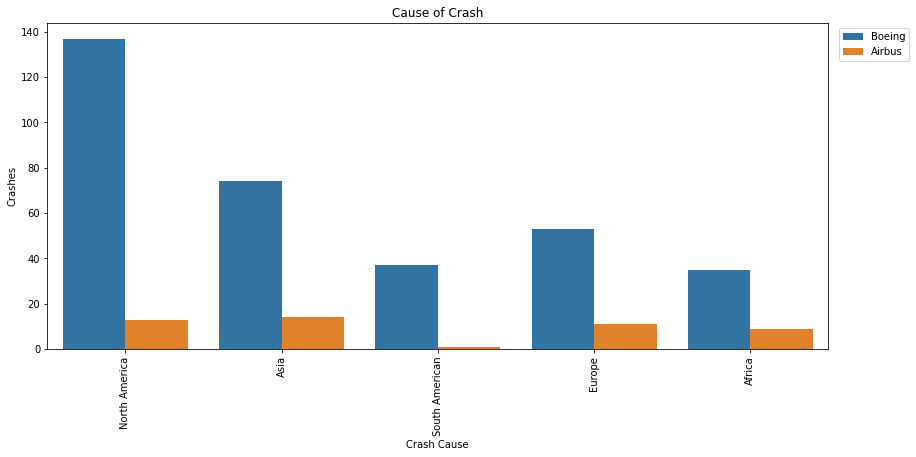

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_aircrafts,x='Region', hue='Manufacturer')
plt.title('Cause of Crash')
plt.xticks(rotation=90)
plt.xlabel('Crash Cause')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1.11,1));

In [ ]:
cause_region = df_aircrafts.groupby("Crash_Cause").Region.value_counts()
cause_region

Crash_Cause      Region        
Collision        North America     6 
                 Asia              1 
                 Europe            1 
                 South American    1 
Combat           Asia              1 
                 Europe            1 
Landing          North America     20
                 Asia              18
                 Europe            13
                 South American    7 
                 Africa            6 
Pilot_Error      North America     4 
                 Asia              3 
                 Europe            2 
Takeoff          North America     62
                 Asia              41
                 Africa            29
                 Europe            27
                 South American    20
Technical_Fault  North America     18
                 Asia              9 
                 Europe            5 
                 South American    5 
                 Africa            3 
Unknown          North America     26
                 E

In [ ]:
weather = df_aircrafts[df_aircrafts['Crash_Cause']=='Weather']
weather_cause = weather.groupby(["Region"])
weather_cause["Fatalities"].sum()

Region
Africa           10.0 
Asia             377.0
Europe           371.0
North America    130.0
Name: Fatalities, dtype: float64

In [ ]:
weather_fatalities = weather.Fatalities.sum()/df_aircrafts.Fatalities.sum()*100
print(weather_fatalities.round(2))
weather.Fatalities.sum()

4.6


888.0

In [ ]:
tf = df_aircrafts[df_aircrafts['Crash_Cause']=='Technical_Fault']
tf_cause = tf.groupby(["Region"])
tf_cause["Fatalities"].sum()

Region
Africa            179.0
Asia              371.0
Europe            476.0
North America     412.0
South American    206.0
Name: Fatalities, dtype: float64

In [ ]:
tf_fatalities = tf.Fatalities.sum()/df_aircrafts.Fatalities.sum()*100
print(tf_fatalities.round(2))
tf.Fatalities.sum()

8.51


1644.0

In [ ]:
cause = ["Weather", "Technical_Fault"]
df_cause = df_aircrafts[df_aircrafts["Crash_Cause"].isin(cause)]

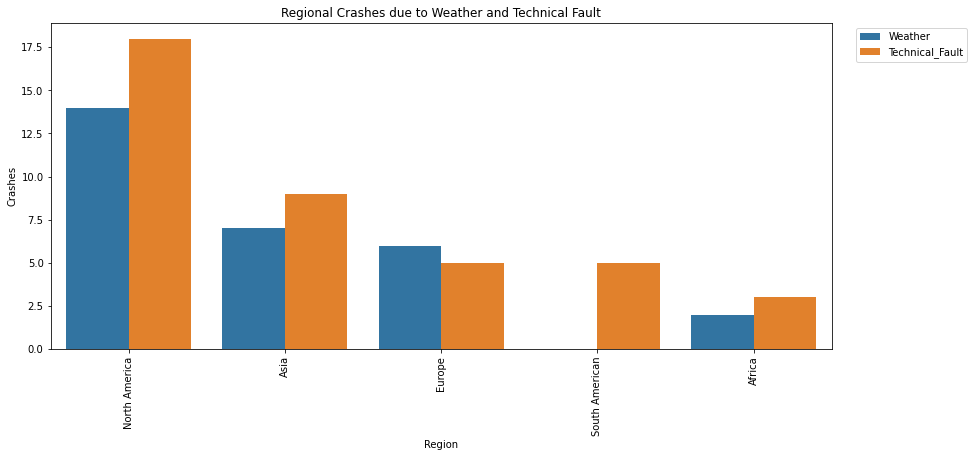

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_cause,x='Region', hue='Crash_Cause')
plt.title('Regional Crashes due to Weather and Technical Fault')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1.18,1));

In [ ]:
w = folium.Map([0,0], tiles = 'stamen terrain', zoom_start=2,  control_scale=True, width="100",height="100")

In [ ]:
for i, row in df_cause.iterrows():

  w_lat = df_cause.at[i,'latitude']
  w_lon = df_cause.at[i,'longitude']
  crash_region = df_cause.at[i, 'Region']

  if row["Crash_Cause"]=="Weather":

    icon=folium.Icon(color="lightblue", icon = "cloud", prefix = "fa")
  else:
    icon = folium.Icon(color="lightred", icon = "exclamation", prefix ="fa" )

  folium.Marker(location=[w_lat,w_lon],popup=crash_region, tooltip="click", icon = icon).add_to(w)

In [ ]:
w

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
columns = ["Manufacturer", "Fatalities", "Aboard", "Crash_Cause", "Region", "Aircraft_Model"]
                
df_cols = df_aircrafts[columns]
df_cols = df_cols.set_index("Aircraft_Model")
df_cols.head()

,Manufacturer,Fatalities,Aboard,Crash_Cause,Region
Aircraft_Model,,,,,
Boeing 40,Boeing,1.0,2.0,Weather,North America
Boeing 40,Boeing,1.0,2.0,Pilot_Error,North America
Boeing 40,Boeing,3.0,3.0,Landing,North America
Boeing 40,Boeing,1.0,1.0,Weather,North America
Boeing 40,Boeing,2.0,2.0,Landing,North America


In [ ]:
interval_cols = ['Aboard', 'Fatalities']
phik_corr = df_cols.phik_matrix(interval_cols=interval_cols)

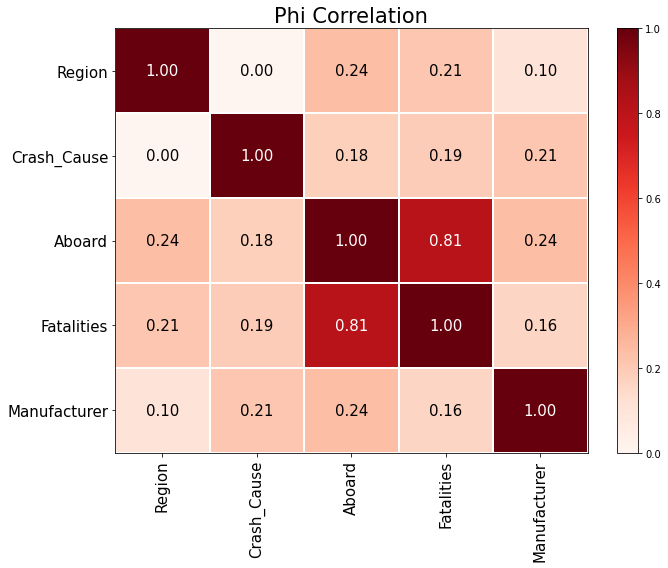

In [ ]:
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"Phi Correlation",
                        fontsize_factor=1.5, 
                        figsize=(10, 8), )
plt.tight_layout()

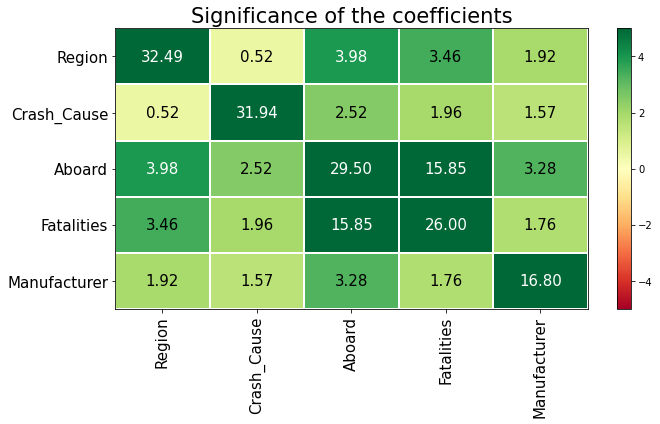

In [ ]:
significance_overview = df_cols.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(10, 6))
plt.tight_layout()

## Task 4: Implement K-means Clustering 

The purpose of this task is to implement k-means clustering to identify correlations between different parameters identified in the previous tasks (heat map).

###Task 4.1: K-means clustering
* Apply k-means to different groups of data to identify correlations.
* Test different k values
  * Is there an obvios best k?

Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Task 4.2: K-means Optimization 
* Apply K-means optimization to find the best k-value using 2 different methods: 
  * Elbow method
  * Silhuette method
* Discuss result
  * Which method is better and why?